<h1 style = "text-align:center;color:red;font-family:algerian;font-size:35px;">Projet Machine learning</h1>

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des données</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 Importation des librairie</h2>
</div>

In [426]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot

import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,validation_curve, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score
import pickle
import warnings as wr
wr.filterwarnings("ignore")

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Répertoire de travail et chargement des données</h2>
</div>


In [427]:
# définir le répertoire du projet contenant le dossier data
HOME_DIR = Path.cwd().parent
print(f"Home directory: {HOME_DIR}")

# définir le répertoire des données
DATA_DIR = Path(HOME_DIR, "data")
print(f"Data directory: {DATA_DIR}")

# Chargement des données
data = pd.read_csv(Path(DATA_DIR, "2016_Building_Energy_Benchmarking_20240128.csv"), sep =";")

Home directory: E:\ISEP4\Semestre7\Machine-learning\Projet-ML
Data directory: E:\ISEP4\Semestre7\Machine-learning\Projet-ML\data


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Exploration des données</h1>
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## Description des variables

| Variable                          | Non-Null Count | Data type     | Description |
|----------------------------------|----------------|-----------|-------------------|
| OSEBuildingID                    | 3376 non-null  | int64     | Identifiant de la propireté |
| DataYear                         | 3376 non-null  | int64     | Année d'enrégistrement |
| BuildingType                     | 3376 non-null  | object    | Type de bâtiment |
| PrimaryPropertyType              | 3376 non-null  | object    | Utilisation principale d’un bien |
| PropertyName                     | 3376 non-null  | object    | Nom de la proprieté |
| Address                          | 3376 non-null  | object    | Adresse postale de la propriété |
| City                             | 3376 non-null  | object    | Ville de la propriété |
| State                            | 3376 non-null  | object    | État de la propriété |
| ZipCode                          | 3360 non-null  | float64   | Code postal |
| TaxParcelIdentificationNumber    | 3376 non-null  | object    | Numéro d'identification fiscal |
| CouncilDistrictCode              | 3376 non-null  | int64     | Code du district du conseil municipal |
| Neighborhood                     | 3376 non-null  | object    | quartier |
| Latitude                         | 3376 non-null  | float64   | Latitude |
| Longitude                        | 3376 non-null  | float64   | Longitude |
| YearBuilt                        | 3376 non-null  | int64     | Année de construction de la propriété |
| NumberofBuildings                | 3368 non-null  | float64   | Nombre de bâtiments inclus dans le rapport de la propriété |
| NumberofFloors                   | 3376 non-null  | int64     | Nombre d’étages déclarés dans Portfolio Manager |
| PropertyGFATotal                 | 3376 non-null  | int64     | Surface de plancher brute totale du bâtiment et du parking |
| PropertyGFAParking               | 3376 non-null  | int64     | Espace total en pieds carrés de tous les types de stationnement |
| PropertyGFABuilding(s)           | 3376 non-null  | int64     | Surface totale en pieds carrés entre les surfaces extérieures des murs d’enceinte d’un bâtiment |
| ListOfAllPropertyUseTypes        | 3367 non-null  | object    | Toutes les utilisations des biens immobiliers déclarées dans Portfolio Manager |
| LargestPropertyUseType           | 3356 non-null  | object    | La plus grande utilisation d’un bien |
| LargestPropertyUseTypeGFA        | 3356 non-null  | float64   | La surface de plancher brute (GFA) de la plus grande utilisation de la propriété |
| SecondLargestPropertyUseType     | 1679 non-null  | object    | La deuxième plus grande utilisation d’une propriété |
| SecondLargestPropertyUseTypeGFA  | 1679 non-null  | float64   | La surface de plancher brute (SPB) de la deuxième utilisation en importance de la propriété |
| ThirdLargestPropertyUseType      | 596 non-null   | object    | La troisième plus grande utilisation d’un bien |
| ThirdLargestPropertyUseTypeGFA   | 596 non-null   | float64   | La surface de plancher brute (SPB) de la troisième plus grande utilisation de la propriété |
| YearsENERGYSTARCertified         | 119 non-null   | object    | Depuis que la propriété a reçu la certification ENERGY STAR |
| ENERGYSTARScore                  | 2533 non-null  | float64   | Une cote de 1 à 100 calculée par l’EPA qui évalue la performance énergétique globale d’une propriété |
| SiteEUI(kBtu/sf)                 | 3369 non-null  | float64   | L’intensité de consommation d’énergie du site (IUE) par surface|
| SiteEUIWN(kBtu/sf)               | 3370 non-null  | float64   | L’intensité de consommation d’énergie du site normalisée en fonction des conditions météorologiques (WN) |
| SourceEUI(kBtu/sf)               | 3367 non-null  | float64   | L’intensité de consommation d’énergie à la source (IUE) |
| SourceEUIWN(kBtu/sf)             | 3367 non-null  | float64   | L’intensité de consommation d’énergie de la source normalisée en fonction des conditions météorologiques (IUE) |
| SiteEnergyUse(kBtu)              | 3371 non-null  | float64   | La quantité annuelle d’énergie consommée par la propriété à partir de toutes les sources d’énergie |
| SiteEnergyUseWN(kBtu)            | 3370 non-null  | float64   | La quantité annuelle d’énergie consommée par la propriété à partir de toutes les sources d’énergie ajustée à ce que la propriété aurait consommé pendant les conditions météorologiques moyennes sur 30 ans |
| SteamUse(kBtu)                   | 3367 non-null  | float64   | La quantité annuelle de vapeur urbaine consommée par la propriété sur le site |
| Electricity(kWh)                 | 3367 non-null  | float64   | La quantité annuelle d’électricité consommée par la propriété sur place |
| Electricity(kBtu)                | 3367 non-null  | float64   | La quantité annuelle d’électricité consommée par la propriété sur place |
| NaturalGas(therms)               | 3367 non-null  | float64   | La quantité annuelle de gaz naturel fournie par les services publics consommée par la propriété |
| NaturalGas(kBtu)                 | 3367 non-null  | float64   | La quantité annuelle de gaz naturel fournie par les services publics consommée par la propriété |
| DefaultData                      | 3376 non-null  | bool      | La propriété utilisait des données par défaut pour au moins une caractéristique de propriété |
| Comments                         | 0 non-null      | float64   | Commentaires |
| ComplianceStatus                 | 3376 non-null  | object    | Si une propriété a satisfait aux exigences en matière d’analyse comparative énergétique pour l’année de déclaration en cours |
| Outlier                          | 32 non-null     | object    | Si une propriété est une valeur aberrante élevée ou faible (O/N) |
| TotalGHGEmissions                | 3367 non-null  | float64   | La quantité totale d’émissions de gaz à effet de serre |
| GHGEmissionsIntensity            | 3367 non-null  | float64   | Émissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété |


## Choix de l'échantillon

In [6]:
## Tableau des effectifs de la variable BuildingType
data['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [65]:
## Suppression des logement Multifamily
df = data.loc[(data.BuildingType != 'Multifamily MR (5-9)') & (data.BuildingType != 'Multifamily LR (1-4)') & (data.BuildingType != 'Multifamily HR (10+)'), :]

In [66]:
## Principales utilisation des Campus
df.loc[df.BuildingType == "Campus", ["BuildingType", "ListOfAllPropertyUseTypes", "LargestPropertyUseType"]]

BuildingType                          ListOfAllPropertyUseTypes  \
35         Campus  Energy/Power Station, Laboratory, Manufacturin...   
105        Campus                                 College/University   
128        Campus                                 College/University   
162        Campus  Laboratory, Non-Refrigerated Warehouse, Office...   
195        Campus                                              Other   
289        Campus  Food Sales, Multifamily Housing, Office, Other...   
301        Campus  Data Center, Office, Parking, Restaurant, Reta...   
340        Campus                                     Other, Parking   
661        Campus                     Manufacturing/Industrial Plant   
954        Campus                                        K-12 School   
1297       Campus  Food Sales, Office, Restaurant, Retail Store, ...   
1300       Campus  Bar/Nightclub, Food Sales, Multifamily Housing...   
1301       Campus                     Food Sales, Office, Restaurant   
1494       Campus                        College/University, Parking   
1692       Campus                                    Adult Education   
1732       Campus                                              Other   
1862       Campus                                              Other   
1993       Campus                                     Other, Parking   
2270       Campus                               K-12 School, Parking   
2325       Campus                                 College/University   
2993       Campus                                        K-12 School   
3022       Campus                                        K-12 School   
3252       Campus                                 College/University   
3274       Campus                                 College/University   

              LargestPropertyUseType  
35                            Office  
105               College/University  
128               College/University  
162                           Office  
195                            Other  
289                     Retail Store  
301                          Parking  
340                            Other  
661   Manufacturing/Industrial Plant  
954                      K-12 School  
1297                    Retail Store  
1300             Multifamily Housing  
1301                      Restaurant  
1494              College/University  
1692                 Adult Education  
1732                           Other  
1862                           Other  
1993                           Other  
2270                     K-12 School  
2325              College/University  
2993                     K-12 School  
3022                     K-12 School  
3252              College/University  
3274              College/University

In [67]:
## Suppression des campus principalement destinés aux logement multifamiliaux
df = df.loc[(df.BuildingType !="Campus") | (df.LargestPropertyUseType != "Multifamily Housing"), :]

In [68]:
# Afficher les 10 premières observation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1667 non-null   int64  
 1   DataYear                         1667 non-null   int64  
 2   BuildingType                     1667 non-null   object 
 3   PrimaryPropertyType              1667 non-null   object 
 4   PropertyName                     1667 non-null   object 
 5   Address                          1667 non-null   object 
 6   City                             1667 non-null   object 
 7   State                            1667 non-null   object 
 8   ZipCode                          1651 non-null   float64
 9   TaxParcelIdentificationNumber    1667 non-null   object 
 10  CouncilDistrictCode              1667 non-null   int64  
 11  Neighborhood                     1667 non-null   object 
 12  Latitude            

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1. Traitement des valeurs manquantes</h3>
</div>

## Variables ayant des valeurs manquantes

<Axes: >

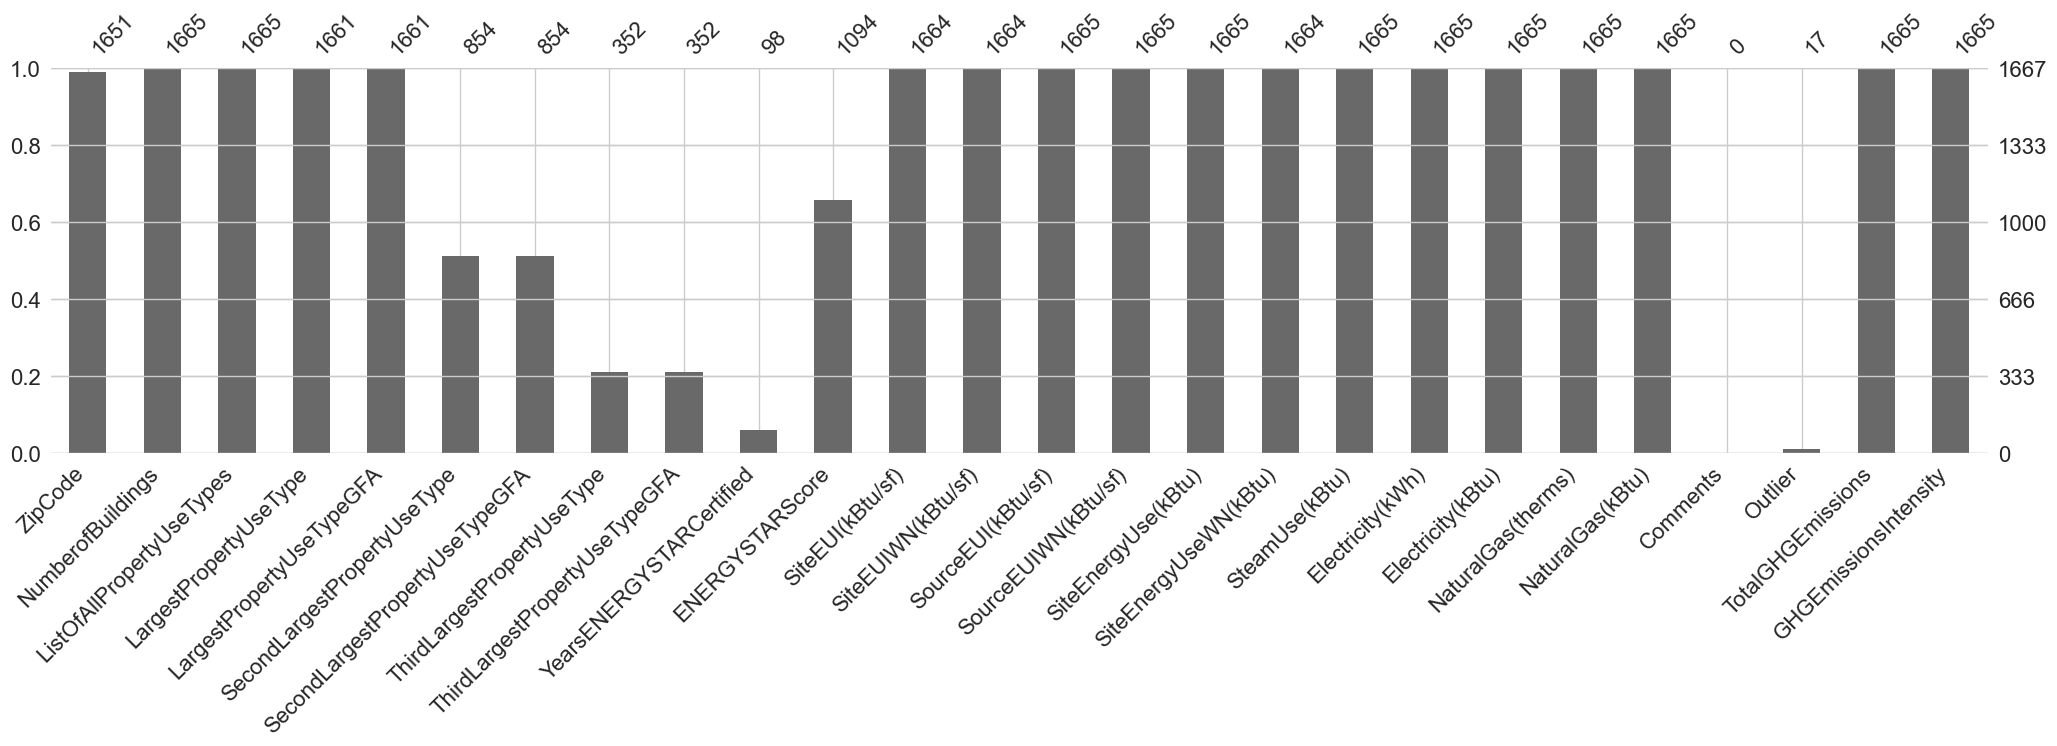

In [69]:
# # A bar chart visualization of the nullity of the given DataFrame.
msno.bar(df[df.columns[df.isna().any()]], figsize = (25, 5))

## Traitement des variables quantité d'énergie consommée

In [70]:
# Afficher les observations pour lesquelles la variable à prédire (SiteEnergyUse(kBtu)) n'est pas renseignée
energy_na = df["SiteEnergyUse(kBtu)"].isnull()
df.loc[energy_na, :]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
578             773      2016  NonResidential  Small- and Mid-Sized Office   
2670          26532      2016  NonResidential           Mixed Use Property   

          PropertyName                 Address     City State  ZipCode  \
578   SEATTLE BUILDING         215 COLUMBIA ST  Seattle    WA  98104.0   
2670  KALBERG BUILDING  4515 UNIVERSITY WAY NE  Seattle    WA  98105.0   

     TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
578                      939000245  ...               NaN               NaN   
2670                    8816401120  ...               NaN               NaN   

      NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
578                  NaN               NaN        False       NaN   
2670                 NaN               NaN        False       NaN   

      ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
578      Non-Compliant      NaN                NaN                    NaN  
2670     Non-Compliant      NaN                NaN                    NaN  

[2 rows x 46 columns]

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">On remarque qu'il y a 9 bâtiments pour lesquels les quantités d’émissions de gaz à effet de serre ne sont pas renseignée. En plus ces bâtiments la plupart des variables susceptibles de déterminer le niveau de la quantité d'émissions de gaz à effet de serre d'un bâtiment sont non renseignées. Au vu la taille de notre échantillons (3376), la non prise en compte de ces 9 bâtiments n'aura pas d'effet statistiquement significatif sur notre étude.</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Nous allons donc poursuivre l'exploration des données sans tenir de ces 9 observations.</p>

In [71]:
# Garder les observations pour lesquelles la quantité d'émission de gaz à effet de serre est renseignée
df = df[df["SiteEnergyUse(kBtu)"].notnull()]

In [72]:
# Afficher les observations pour lesquelles la variable SiteEUI(kBtu/sf) n'est pas renseignée 
SiteEUI_kBtu_sf_na = df['SiteEUI(kBtu/sf)'].isnull()
df.loc[SiteEUI_kBtu_sf_na, ['PropertyName', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal']]

PropertyName  SiteEUI(kBtu/sf)  \
304  Washington State Convention Center               NaN   

     SiteEnergyUse(kBtu)  PropertyGFATotal  
304                  0.0           1400000

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">L'intensité de consommation d’énergie du site (IUE) peut êtimé par le rapport de la consommation d’énergie du site d’une propriété et sa surface de plancher brute.</p>

In [73]:
df['SiteEUI(kBtu/sf)'].fillna(df['SiteEnergyUse(kBtu)']/df['PropertyGFATotal'], inplace=True)
df.loc[SiteEUI_kBtu_sf_na, ['PropertyName', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal']]

PropertyName  SiteEUI(kBtu/sf)  \
304  Washington State Convention Center               0.0   

     SiteEnergyUse(kBtu)  PropertyGFATotal  
304                  0.0           1400000

In [74]:
# Afficher les observations pour lesquelles la variable SiteEUIWN(kBtu/sf) /SiteEnergyUseWN(kBtu) n'est pas renseignée 
SiteEUIWN_kBtu_sf_na = (df['SiteEUIWN(kBtu/sf)'].isnull() | df['SiteEnergyUseWN(kBtu)'].isnull())
df.loc[SiteEUIWN_kBtu_sf_na, ['PropertyName', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'PropertyGFATotal']]

PropertyName  SiteEUIWN(kBtu/sf)  \
563  Market Place I & II-2003 Western Avenue                 NaN   

     SiteEnergyUseWN(kBtu)  PropertyGFATotal  
563                    NaN            131143

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Le tableau ci-dessus montre une proprieté pour laquelle l'intensité de consommation d'énergie du site (IUE) normalisée et la quantité annuelle d'énergie consommée ajustée sont non renseignée. La méthode d'imputation précédemment utilisée ne s'applique pas dans ce cas. Cependant, une approche simple consiste à imputer ces deux valeurs manquantes respectivement par leurs équivalents non ajustés, c'est-à-dire l'intensité de consommation d'énergie du site (IUE) non normalisée et la quantité annuelle d'énergie consommée non ajustée.</p>

In [75]:
df['SiteEUIWN(kBtu/sf)'].fillna(df['SiteEUI(kBtu/sf)'], inplace = True)
df['SiteEnergyUseWN(kBtu)'].fillna(df['SiteEnergyUse(kBtu)'], inplace = True)
# Afficher les résultats
df.loc[SiteEUIWN_kBtu_sf_na, ['PropertyName', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'PropertyGFATotal']]

PropertyName  SiteEUIWN(kBtu/sf)  \
563  Market Place I & II-2003 Western Avenue                39.5   

     SiteEnergyUseWN(kBtu)  PropertyGFATotal  
563              5177270.5            131143

<Axes: >

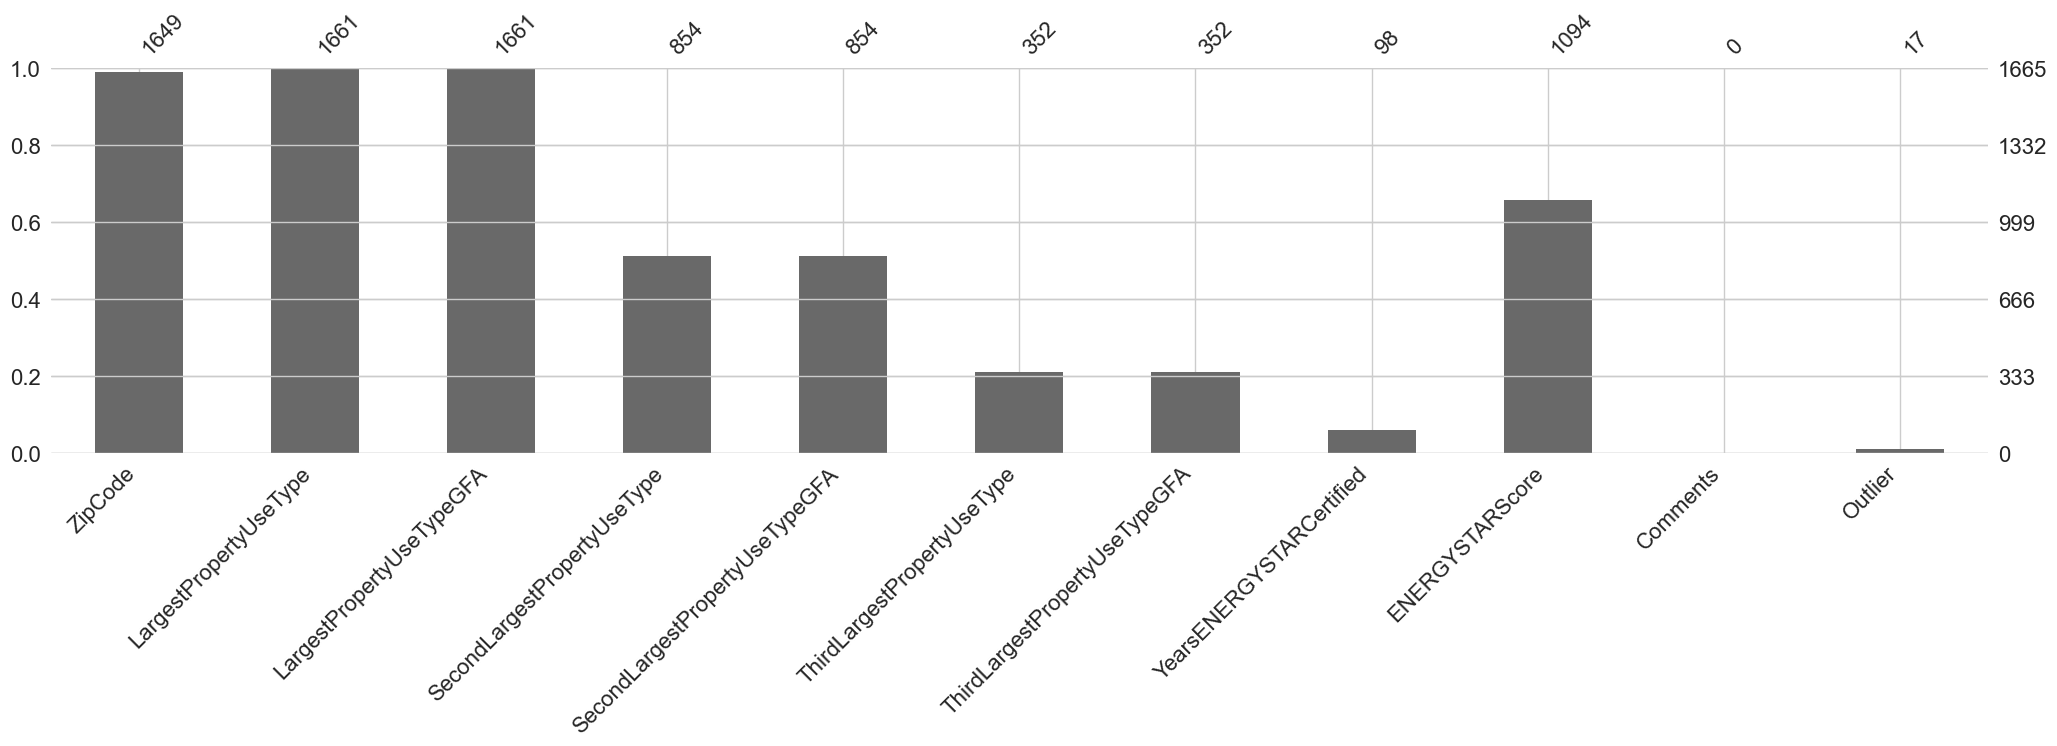

In [76]:
# A new bar chart visualization of the nullity of the given DataFrame.
msno.bar(df[df.columns[df.isna().any()]], figsize = (25, 5))

## Traitement des variables Utilisation du bien immobilier

In [77]:
# Afficher les observations pour lesquelles la variable LargestPropertyUseType n'est pas renseignée
LargeUse_na = df.LargestPropertyUseType.isnull()
df.loc[LargeUse_na ,['OSEBuildingID', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']] 

OSEBuildingID                          ListOfAllPropertyUseTypes  \
353             496  Fitness Center/Health Club/Gym, Office, Other ...   
1147          21103                                              Hotel   
2414          25568                                             Office   
2459          25711                                         Restaurant   

     LargestPropertyUseType  
353                     NaN  
1147                    NaN  
2414                    NaN  
2459                    NaN

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Nous allons supposer que, pour les bâtiments pour lesquels la variable « LargestPropertyUseType » n’est pas spécifiée, la principale utilisation du bien correspond au premier élément de la liste de toutes les utilisations déclarées de ce bien immobilier. Il est d’ailleurs à noter que, pour la plupart de ces bâtiments, une seule utilisation du bien est enregistrée.</p>

In [78]:
# Traitement des Na de la variable "LargestPropertyUseType" comme mentionné ci-dessus
df.loc[LargeUse_na, "LargestPropertyUseType"] = [Use.split(",")[0].strip() for Use in df.loc[LargeUse_na, "ListOfAllPropertyUseTypes"]]
#
df.loc[LargeUse_na,['OSEBuildingID', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']]

OSEBuildingID                          ListOfAllPropertyUseTypes  \
353             496  Fitness Center/Health Club/Gym, Office, Other ...   
1147          21103                                              Hotel   
2414          25568                                             Office   
2459          25711                                         Restaurant   

              LargestPropertyUseType  
353   Fitness Center/Health Club/Gym  
1147                           Hotel  
2414                          Office  
2459                      Restaurant

In [79]:
# Afficher les observations pour lesquelles la variable LargestPropertyUseTypeGFA n'est pas renseignée
LargestPropertyUseTypeGFA_na = df.LargestPropertyUseTypeGFA.isnull()
df.loc[LargestPropertyUseTypeGFA_na ,['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'PropertyGFATotal']]

ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353   Fitness Center/Health Club/Gym                        NaN   
1147                           Hotel                        NaN   
2414                          Office                        NaN   
2459                      Restaurant                        NaN   

      PropertyGFATotal  
353             111445  
1147             61721  
2414             48350  
2459             28800

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Pour la plupart de ces observation, une seule utilisation du bien immobilier est entrégistrée. Par conséquent, les valeurs manquantes de la variable « surface de plancher brute (SPB) de la plus grande utilisation de la propriété » peuvent être attribuées à la surface de plancher brute totale associée à cette propriété.</p>

In [80]:
## Traitement des na comme mentionné ci-dessus
df['LargestPropertyUseTypeGFA'].fillna(df['PropertyGFATotal'], inplace=True)
## Voir le résultat du traitement
df.loc[LargestPropertyUseTypeGFA_na ,['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'PropertyGFATotal']]

ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353   Fitness Center/Health Club/Gym                   111445.0   
1147                           Hotel                    61721.0   
2414                          Office                    48350.0   
2459                      Restaurant                    28800.0   

      PropertyGFATotal  
353             111445  
1147             61721  
2414             48350  
2459             28800

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Pour une analyse approfondie des variables "Deuxième plus grande utilisation d’une propriété", "Surface de plancher brute (SPB) de la deuxième utilisation en importance de la propriété.", "Troisième plus grande utilisation d’une propriété" et "Surface de plancher brute (SPB) de la troisième plus grande utilisation de la propriété.", nous allons créer une nouvelle variable fournissant le nombre d'utilisations de la propriété et qui sera nommée NumberPropertyUseType</p>

In [81]:
# Vréation de la variable NumberPropertyUseType
df['NumberPropertyUseType'] = [len(AllPropertyUseTypes.split(",")) for AllPropertyUseTypes in df.ListOfAllPropertyUseTypes]

In [82]:
# Afficher les observations pour lesquelles la variable SecondLargestPropertyUseType n'est pas renseignée 
SecondLargestPropertyUseType_na = df.SecondLargestPropertyUseType.isnull()
df.loc[SecondLargestPropertyUseType_na, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']]

ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                        Hotel                  Hotel   
2                        Hotel                  Hotel   
3                        Hotel                  Hotel   
5               Police Station         Police Station   
6                        Hotel                  Hotel   
...                        ...                    ...   
3367        Other - Recreation     Other - Recreation   
3369                    Office                 Office   
3370        Other - Recreation     Other - Recreation   
3371                    Office                 Office   
3372        Other - Recreation     Other - Recreation   

     SecondLargestPropertyUseType  
0                             NaN  
2                             NaN  
3                             NaN  
5                             NaN  
6                             NaN  
...                           ...  
3367                          NaN  
3369                          NaN  
3370                          NaN  
3371                          NaN  
3372                          NaN  

[811 rows x 3 columns]

In [83]:
# Afficher les observations pour lesquelles la variable SecondLargestPropertyUseType n'est pas renseignée 
# et que plus d'une utilisation a été enrégistrée pour cette proprieté
df.loc[SecondLargestPropertyUseType_na & df.NumberPropertyUseType > 1, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'NumberPropertyUseType']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, NumberPropertyUseType]
Index: []

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Nous notons que la variable "Deuxième plus grande utilisation d’une propriété" est correctement enregistrée pour les propriétés qui enregistrent plus d'une utilisation. Par conséquent, es valeurs manquantes de la variable "SecondLargestPropertyUseType" est parfaitement justifiée.</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Une telle analyse peut également être effectuée sur les variables : SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType et ThirdLargestPropertyUseTypeGFA.</p>

In [84]:
# Variable SecondLargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA_na = df.SecondLargestPropertyUseTypeGFA.isnull()
df.loc[SecondLargestPropertyUseTypeGFA_na  & df.NumberPropertyUseType > 1, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseTypeGFA]
Index: []

In [85]:
# Variable ThirdLargestPropertyUseType
ThirdLargestPropertyUseType_na = df.ThirdLargestPropertyUseType.isnull()
df.loc[ThirdLargestPropertyUseType_na  & df.NumberPropertyUseType > 2, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'ThirdLargestPropertyUseType']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, ThirdLargestPropertyUseType]
Index: []

In [86]:
# Variable ThirdLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA_na = df.ThirdLargestPropertyUseTypeGFA.isnull()
df.loc[ThirdLargestPropertyUseTypeGFA_na  & df.NumberPropertyUseType > 2, ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']]

Empty DataFrame
Columns: [ListOfAllPropertyUseTypes, LargestPropertyUseType, ThirdLargestPropertyUseTypeGFA]
Index: []

## Les variables contenant encore des valeurs manquantes

<Axes: >

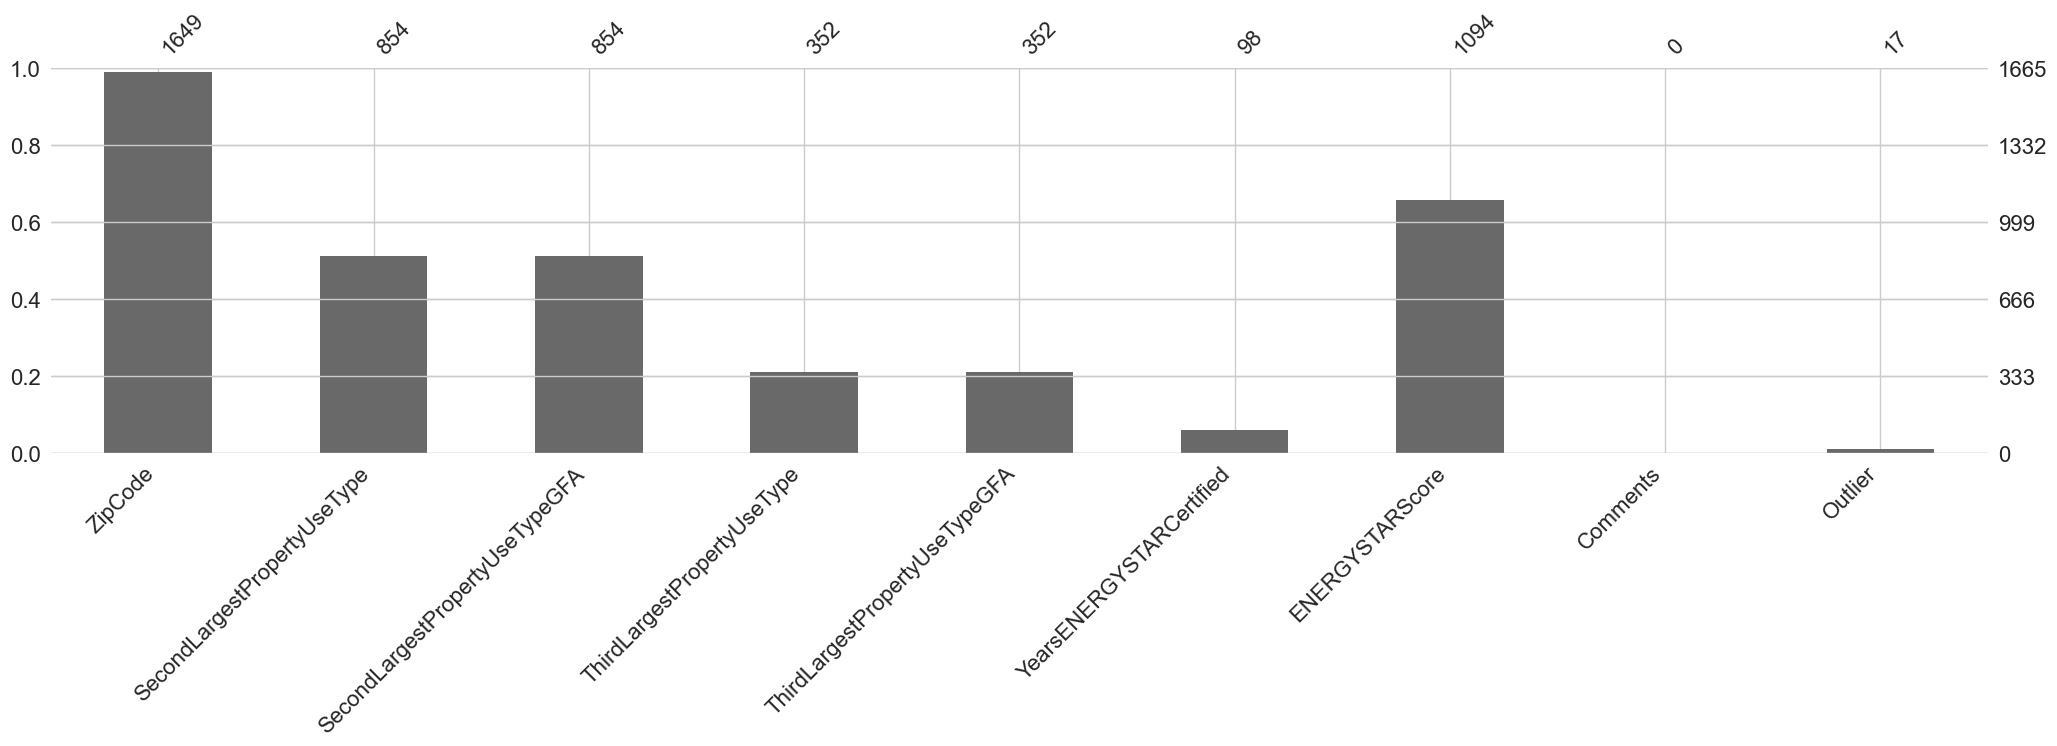

In [87]:
# A new bar chart visualization of the nullity of the given DataFrame.
msno.bar(df[df.columns[df.isna().any()]], figsize = (25, 5))

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Comme nous l'avons expliqué précédemment, l'absence de données pour les variables SecondLargestPropertyUseType et SecondLargestPropertyUseTypeGFA (ou respectivement ThirdLargestPropertyUseType et ThirdLargestPropertyUseTypeGFA) est justifiée par le fait que les biens immobiliers correspondants sont dédiés à une seule utilisation (ou au plus deux).</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">En ce qui concerne les variables ZipCode (code postal de la propriété), YearsENERGYSTARCertified, Comments et Outilier, leur traitement n'est pas essentiel pour notre étude. Même si cela était nécessaire, nous ne disposons pas de méthodes statistiques appropriées pour les traiter.</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Enfin, s'agissant de la variable ENERGYSTARScore (score de performance énergétique globale d'une propriété) qui présente également des valeurs manquantes, nous examinerons après son importance pour la prédiction de la consommation d'énergie.</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2. Choix des variables</h3>
</div>

Mettre un commentaire

In [88]:
## Suppression des variables non pertinente
df.drop(["PropertyName", "Address", "City", "State", "ZipCode", "TaxParcelIdentificationNumber", "CouncilDistrictCode", "ListOfAllPropertyUseTypes", "Comments"], axis =1, inplace = True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3. Analyse exploratoire des variables quantitatives</h3>
</div>

In [91]:
## Liste des variables quantitatives
var_quanti = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("les variables quantitatives : \n")
var_quanti

les variables quantitatives : 



['OSEBuildingID',
 'DataYear',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'NumberPropertyUseType']

In [92]:
len(var_quanti)

28

## Résumé descriptif des variables quantitatives

In [108]:
## Résumé descriptifs des variables quantitatives
df[var_quanti[:15]].describe()

OSEBuildingID  DataYear     Latitude    Longitude    YearBuilt  \
count    1665.000000    1665.0  1665.000000  1665.000000  1665.000000   
mean    16336.480480    2016.0    47.616038  -122.332915  1961.968769   
std     13839.670457       0.0     0.048197     0.024597    32.743837   
min         1.000000    2016.0    47.499170  -122.411820  1900.000000   
25%       582.000000    2016.0    47.585420  -122.343280  1930.000000   
50%     21142.000000    2016.0    47.612340  -122.332940  1965.000000   
75%     24602.000000    2016.0    47.649650  -122.321710  1989.000000   
max     50226.000000    2016.0    47.733870  -122.258640  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1665.000000     1665.000000      1.665000e+03   
mean            1.168769        4.122523      1.189791e+05   
std             2.932286        6.569113      2.976118e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.949800e+04   
50%             1.000000        2.000000      4.929900e+04   
75%             1.000000        4.000000      1.060000e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1665.000000            1.665000e+03               1.665000e+03   
mean         12921.218619            1.060579e+05               9.872346e+04   
std          42309.051377            2.844542e+05               2.764650e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.849200e+04               2.555700e+04   
50%              0.000000            4.741500e+04               4.392000e+04   
75%              0.000000            9.490000e+04               9.200000e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       854.000000                      352.000000   
mean                      36835.014399                    14955.114769   
std                       69880.359700                    36838.015336   
min                           0.000000                        0.000000   
25%                        5325.000000                     2656.000000   
50%                       12011.500000                     5965.500000   
75%                       31899.000000                    12965.500000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  
count      1094.000000       1665.000000  
mean         65.449726         72.107628  
std          28.492928         74.068547  
min           1.000000          0.000000  
25%          48.000000         33.700001  
50%          73.000000         51.799999  
75%          89.000000         81.500000  
max         100.000000        834.400024

In [109]:
df[var_quanti[15:]].describe()

SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count         1665.000000         1665.000000           1665.000000   
mean            74.541081          175.774835            178.037177   
std             75.032870          185.974396            185.961682   
min              0.000000            0.000000             -2.100000   
25%             35.400002           76.400002             79.300003   
50%             53.799999          130.899994            134.100006   
75%             85.199997          203.800003            205.399994   
max            834.400024         2620.000000           2620.000000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count         1.665000e+03           1.665000e+03    1.665000e+03   
mean          8.440732e+06           8.065631e+06    5.128804e+05   
std           3.025267e+07           2.203864e+07    5.515586e+06   
min           0.000000e+00           0.000000e+00    0.000000e+00   
25%           1.228114e+06           1.294615e+06    0.000000e+00   
50%           2.553764e+06           2.685146e+06    0.000000e+00   
75%           6.917280e+06           7.109712e+06    0.000000e+00   
max           8.739237e+08           4.716139e+08    1.349435e+08   

       Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
count      1.665000e+03       1.665000e+03        1.665000e+03   
mean       1.712993e+06       5.844733e+06        1.972028e+04   
std        6.096985e+06       2.080291e+07        9.373504e+04   
min       -3.382680e+04      -1.154170e+05        0.000000e+00   
25%        2.112968e+05       7.209450e+05        0.000000e+00   
50%        4.722202e+05       1.611215e+06        4.995090e+03   
75%        1.422930e+06       4.855036e+06        1.522434e+04   
max        1.925775e+08       6.570744e+08        2.979090e+06   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
count      1.665000e+03        1665.000000            1665.000000   
mean       1.972028e+06         185.068577               1.608462   
std        9.373504e+06         752.191863               2.337449   
min        0.000000e+00          -0.800000              -0.020000   
25%        0.000000e+00          19.930000               0.350000   
50%        4.995090e+05          49.580000               0.880000   
75%        1.522434e+06         142.390000               1.890000   
max        2.979090e+08       16870.980000              34.090000   

       NumberPropertyUseType  
count            1665.000000  
mean                1.893093  
std                 1.218589  
min                 1.000000  
25%                 1.000000  
50%                 2.000000  
75%                 2.000000  
max                13.000000

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">On remarque que les variables SourceEUIWN(kBtu/sf), Electricity(kWh), Electricity(kBtu), TotalGHGEmissions, GHGEmissionsIntensity préésentent des valeurs négatives.</p>

In [115]:
df.loc[(df['SourceEUIWN(kBtu/sf)'] <0)  | (df["Electricity(kWh)"] <0) | (df["Electricity(kBtu)"] <0) | (df["TotalGHGEmissions"] <0) | (df["TotalGHGEmissions"] <0) | (df["GHGEmissionsIntensity"]<0), ["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "NaturalGas(kBtu)", "SourceEUIWN(kBtu/sf)", "Electricity(kWh)", "Electricity(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity"]]

SiteEnergyUse(kBtu)  SteamUse(kBtu)  NaturalGas(kBtu)  \
3206          342726.0938             0.0               0.0   

      SourceEUIWN(kBtu/sf)  Electricity(kWh)  Electricity(kBtu)  \
3206                  -2.1      -33826.80078          -115417.0   

      TotalGHGEmissions  GHGEmissionsIntensity  
3206               -0.8                  -0.02

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Ces valeurs négatives identifiées semblent être liées à une erreur de saisie. En effet, la quantité totale d'énergie enrégistrée semble être du même ordre de gradeur que la quantité d'électricité consommée qui cependant enrégistré en valeurs négatives. Nous pouvons donc corriger cette anomalie en remplaçant ces valeurs négatives par leurs opposés.</p>

In [118]:
## Les valeurs négatives identifiées
values_neg = df.loc[(df['SourceEUIWN(kBtu/sf)'] <0)  | (df["Electricity(kWh)"] <0) | (df["Electricity(kBtu)"] <0) | (df["TotalGHGEmissions"] <0) | (df["TotalGHGEmissions"] <0) | (df["GHGEmissionsIntensity"]<0), ["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "NaturalGas(kBtu)", "SourceEUIWN(kBtu/sf)", "Electricity(kWh)", "Electricity(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity"]]
## Imputer ces valeurs négatives par leurs valeurs absolues
df.loc[(df['SourceEUIWN(kBtu/sf)'] <0)  | (df["Electricity(kWh)"] <0) | (df["Electricity(kBtu)"] <0) | (df["TotalGHGEmissions"] <0) | (df["TotalGHGEmissions"] <0) | (df["GHGEmissionsIntensity"]<0), ["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "NaturalGas(kBtu)", "SourceEUIWN(kBtu/sf)", "Electricity(kWh)", "Electricity(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity"]] = values_neg.abs()
## Y a t-il encore des valeurs négatives ?
df.loc[(df['SourceEUIWN(kBtu/sf)'] <0)  | (df["Electricity(kWh)"] <0) | (df["Electricity(kBtu)"] <0) | (df["TotalGHGEmissions"] <0) | (df["TotalGHGEmissions"] <0) | (df["GHGEmissionsIntensity"]<0), ["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "NaturalGas(kBtu)", "SourceEUIWN(kBtu/sf)", "Electricity(kWh)", "Electricity(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity"]]

Empty DataFrame
Columns: [SiteEnergyUse(kBtu), SteamUse(kBtu), NaturalGas(kBtu), SourceEUIWN(kBtu/sf), Electricity(kWh), Electricity(kBtu), TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

## Aperçu des boîtes à moustache

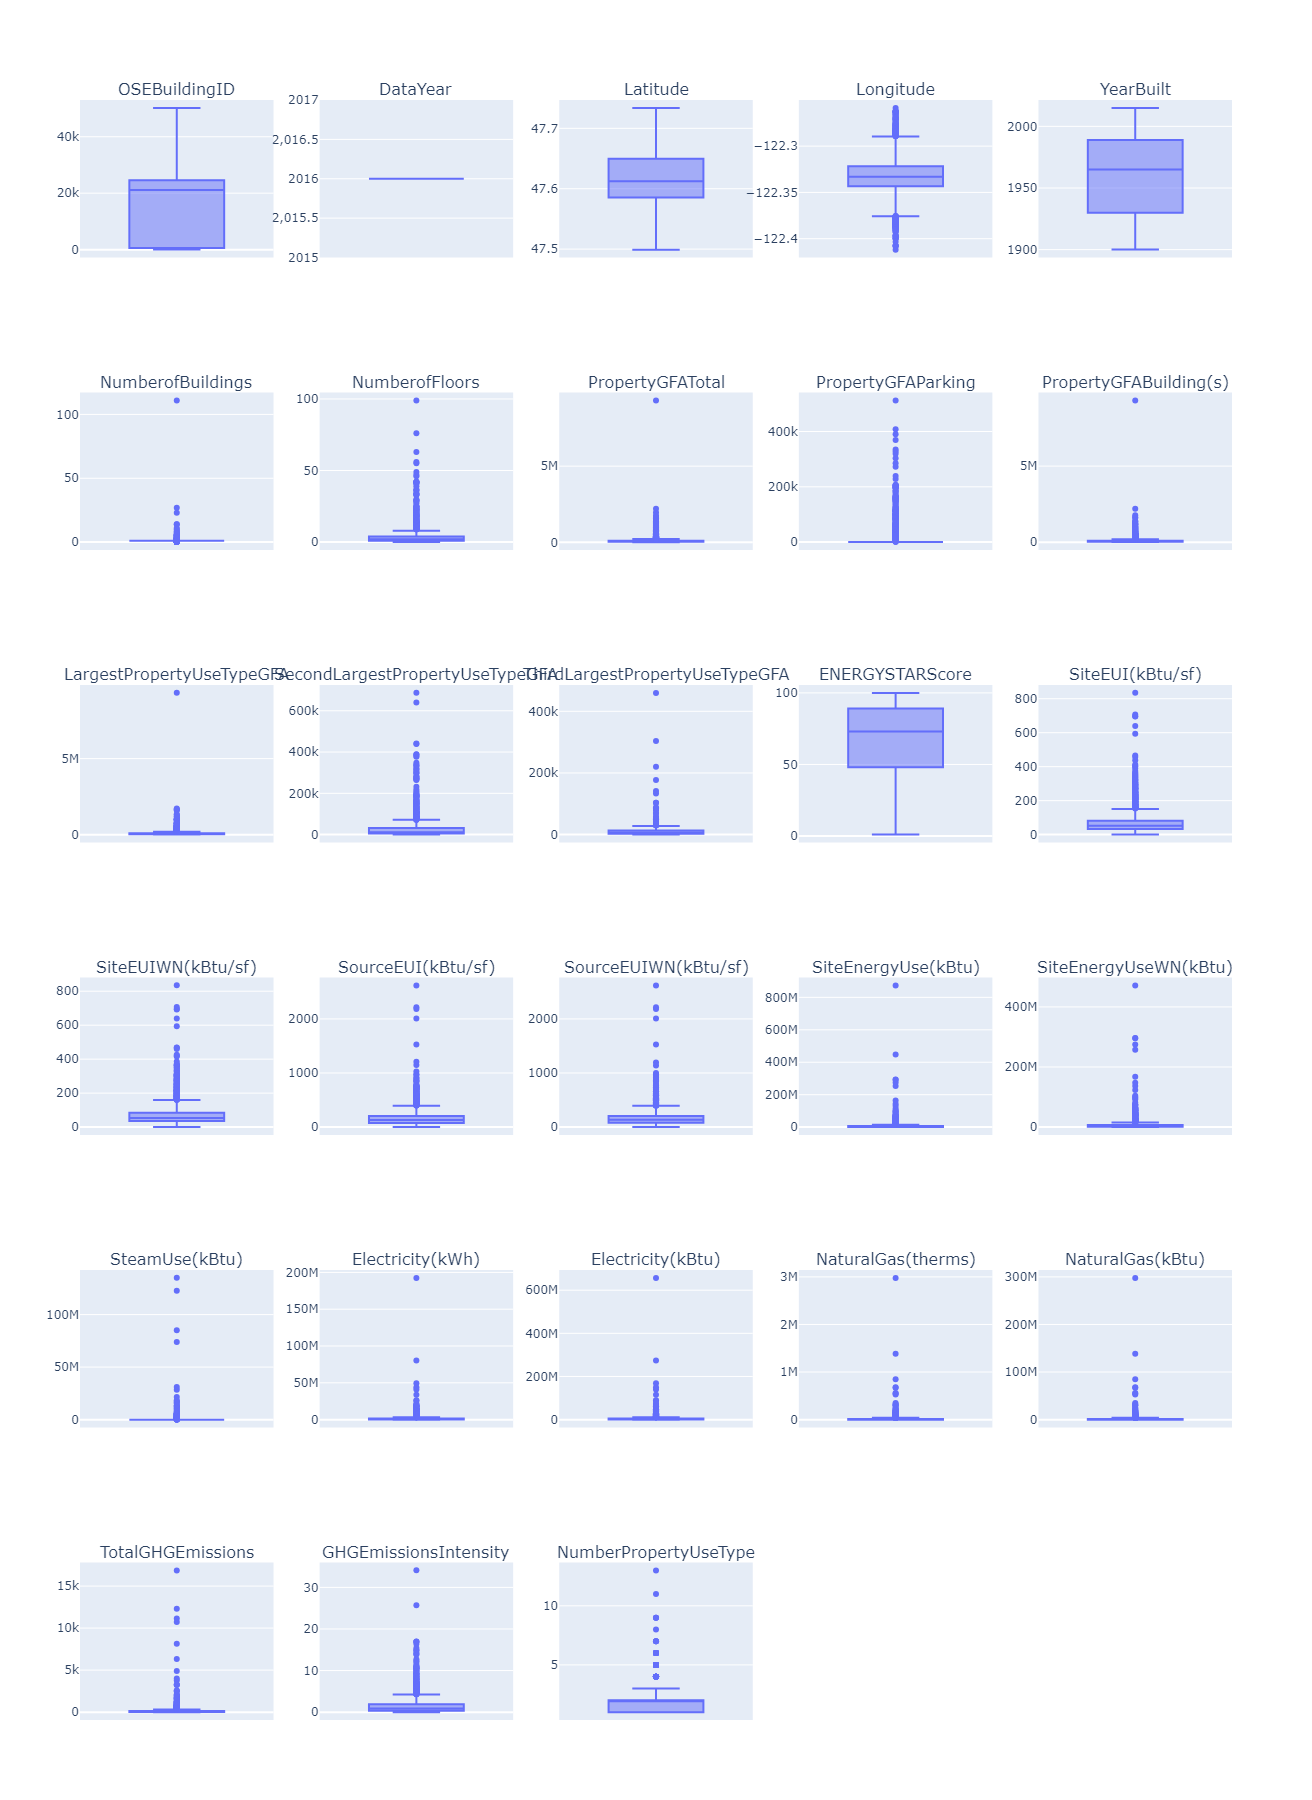

In [119]:
# Nombre de box-plots par ligne
box_plots_per_row = 5

# Nombre total de lignes nécessaires
total_rows = (len(var_quanti) - 1) // box_plots_per_row + 1

# Création des sous-tracés
fig = make_subplots(rows=total_rows, cols=box_plots_per_row, subplot_titles=var_quanti)

# Affichage des box-plots sur les sous-tracés
for i, var in enumerate(var_quanti):
    row = i // box_plots_per_row + 1
    col = i % box_plots_per_row + 1

    box_fig = px.box(df, y=var, title=var)
    box_fig.update_yaxes(title_text=var)

    # Personnalisation des dimensions de la figure
    box_fig.update_layout(
        width=250,  # Largeur de la figure
        height=300,  # Hauteur de la figure
        margin=dict(l=50, r=50, b=50, t=50),  # Marges de la figure
    )

    # Ajout du box-plot au sous-tracé correspondant
    for trace in box_fig.data :
        fig.add_trace(trace, row=row, col=col)

# Mise à jour du layout de la figure principale
fig.update_layout(showlegend=False, height=total_rows * 300, width=box_plots_per_row * 250)

# Affichage de la figure principale
fig.show()

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">De l'observation des box-plots, on remarque que la plupart des variables présentent des valeurs extrêmes assez conséquentes.</p>

## Analyse de la corrélation entre les différentes variables quantitatives

In [152]:
var_quanti = df.columns

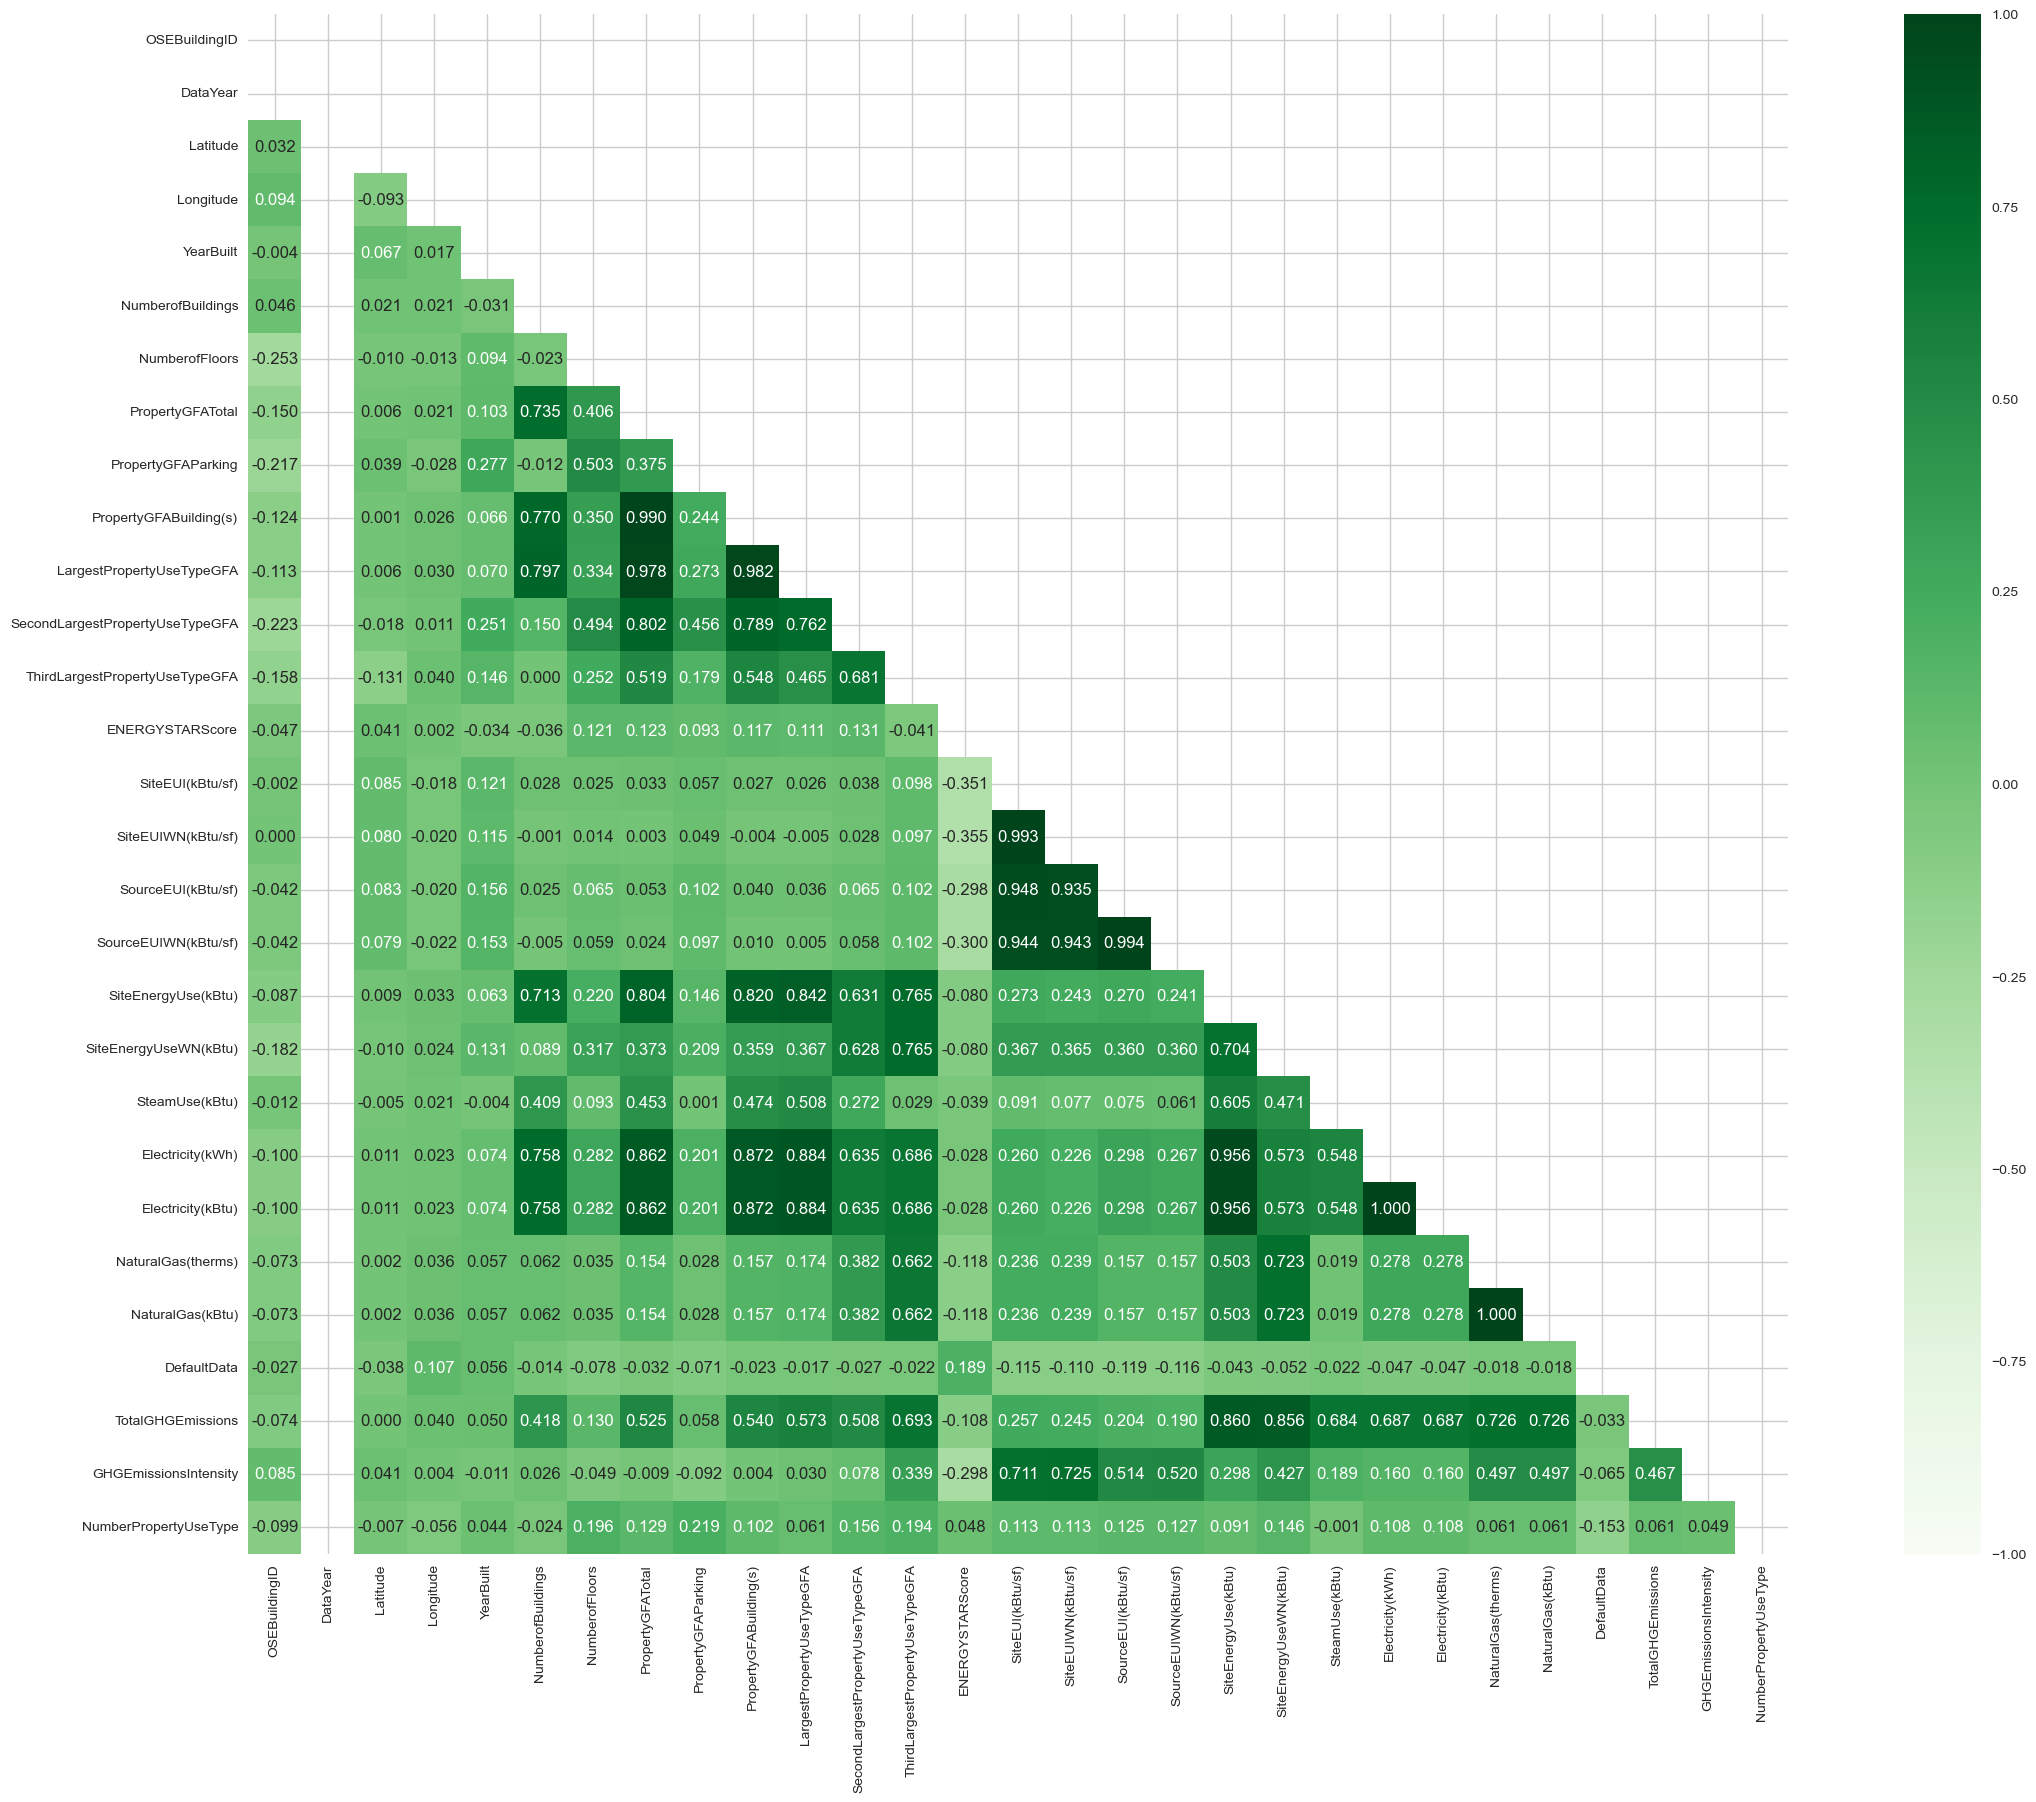

In [153]:
# correlation plot
plt.figure(figsize=(30, 20))  # Ajustez la taille ici
corr = df[var_quanti].corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True,
            fmt='.3f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);


<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Les émissions de gaz à effet de serre présentent généralement une corrélation linéaire significative avec notre variable cible (SiteEnergyUse(kBtu)). Toutefois, il est important de noter que ces émissions sont estimées en fonction de la quantité d'énergie consommée. Par conséquent, la création d'un modèle de prédiction pour la quantité d'énergie consommée par un bâtiment ne devrait pas dépendre de la quantité d'émissions de gaz à effet de serre, car ces données ne sont estimées qu'après avoir déterminé la quantité d'énergie consommée par les bâtiments.</p>
<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Par contre, les variables OSEBuildingID, DataYear, Latitude et  Longitude présentent une très faibles corrélations avec les autres variables. Ce qui n'est sans doûte pas surprenant car ces variables sont censés nous permettre d'identifier les différentes observations et non les expliquer. </p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Il semble clairement exister une corrélation parfaite entre la quantité d'électricité consommée et notre variable cible à prédire (SiteEnergyUse(kBtu)). Ceci est vraisemblablement dû au fait que la variable cible semble être une somme parfaite de la quantité d'énergie consommée en électricité, en gaz naturel et en vapeur urbaine, comme le démontre la figure ci-dessous.</p>

Text(0.5, 1.0, "Décomposition de la quantité annuelle d'énergie consommée")

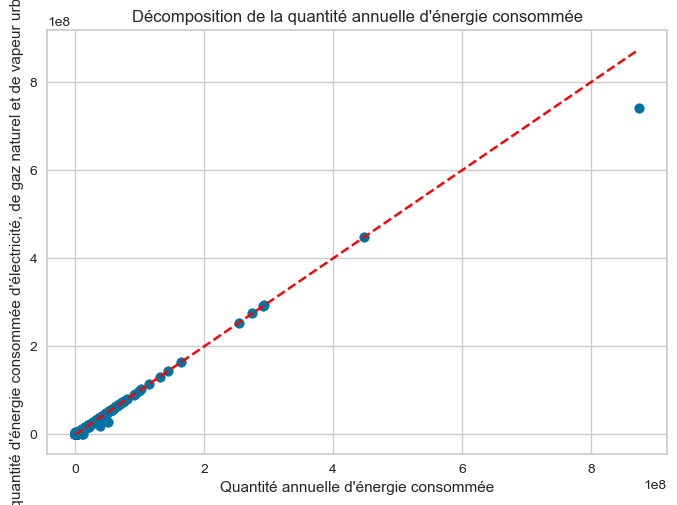

In [219]:
x = df["SiteEnergyUse(kBtu)"]
y = df["Electricity(kBtu)"] + df["NaturalGas(kBtu)"] + df["SteamUse(kBtu)"]
plt.scatter(x,y)
plt.plot([0, max(x)], [0, max(x)], color='red', linestyle='--')

# Ajouter des étiquettes et une légende
plt.xlabel("Quantité annuelle d'énergie consommée")
plt.ylabel("Somme de la quantité d'énergie consommée d'électricité, de gaz naturel et de vapeur urbaine consommée")
plt.title("Décomposition de la quantité annuelle d'énergie consommée")

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Ces trois variables ne seront donc pas prises encore dans la formation du modèle prédictif.</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">La variable PropertyGFATotal présente une forte corrélation avec les variables LargestPropertyUseTypeGFA et SecondLargestPropertyUseTypeGFA. Ce que l'on pouvait s'y atttendre car cette première est déduite des autres. Dans la formation de notre modèle nous prendrons pas en compte la variable  PropertyGFATotal.</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Etant donné que les variables SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf) sont calculées à partir de notre variable à prédire, elles ne seront donc pas prise en compte dans la formation de notre modèle.</p>

## Linéarisation des variables

In [137]:
# Création d'un nouveau DataFrame pour stocker les variables linéarisées
df_quant_log = pd.DataFrame()
df_quant_log['OSEBuildingID'] = df['OSEBuildingID']

# Linéariser chaque variable
for col in df[var_quanti[1:]].columns:
    df_quant_log[col + '_log'] = np.log(df[col]+1)

In [138]:
df_quant_log.head()

OSEBuildingID  YearBuilt_log  NumberofBuildings_log  NumberofFloors_log  \
0              1       7.564238               0.693147            2.564949   
1              2       7.599401               0.693147            2.484907   
2              3       7.585789               0.693147            3.737670   
3              5       7.563720               0.693147            2.397895   
4              8       7.591357               0.693147            2.944439   

   PropertyGFATotal_log  PropertyGFAParking_log  PropertyGFABuilding(s)_log  \
0             11.390023                0.000000                   11.390023   
1             11.547974                9.620129                   11.390792   
2             13.770629               12.189532                   13.540275   
3             11.023878                0.000000                   11.023878   
4             12.075856               11.034906                   11.640272   

   LargestPropertyUseTypeGFA_log  SecondLargestPropertyUseTypeGFA_log  \
0                      11.390023                                  NaN   
1                      11.337154                             9.620129   
2                      13.536450                                  NaN   
3                      11.023878                                  NaN   
4                      11.723559                            11.127410   

   ThirdLargestPropertyUseTypeGFA_log  ...  SourceEUIWN(kBtu/sf)_log  \
0                                 NaN  ...                  5.247024   
1                            8.438799  ...                  5.195177   
2                                 NaN  ...                  5.501666   
3                                 NaN  ...                  5.416100   
4                            0.000000  ...                  5.378052   

   SiteEnergyUse(kBtu)_log  SiteEnergyUseWN(kBtu)_log  SteamUse(kBtu)_log  \
0                15.793246                  15.824652           14.510597   
1                15.942305                  15.974742            0.000000   
2                18.100297                  18.118725           16.886654   
3                15.731637                  15.753792           14.610513   
4                16.466822                  16.500395            0.000000   

   Electricity(kWh)_log  Electricity(kBtu)_log  NaturalGas(therms)_log  \
0             13.960922              15.188220                9.454504   
1             13.764666              14.991964               10.848401   
2             16.490723              17.718022                9.611731   
3             13.606672              14.833970                9.804392   
4             14.268781              15.496079               11.385558   

   NaturalGas(kBtu)_log  TotalGHGEmissions_log  GHGEmissionsIntensity_log  
0             14.059596               5.525373                   1.342865  
1             15.453552               5.693261                   1.350667  
2             14.216834               7.645053                   1.160021  
3             14.409508               5.660979                   1.735189  
4             15.990717               6.226556                   1.355835  

[5 rows x 24 columns]

### Aperçu des boîtes à moustache des variables linéarisées

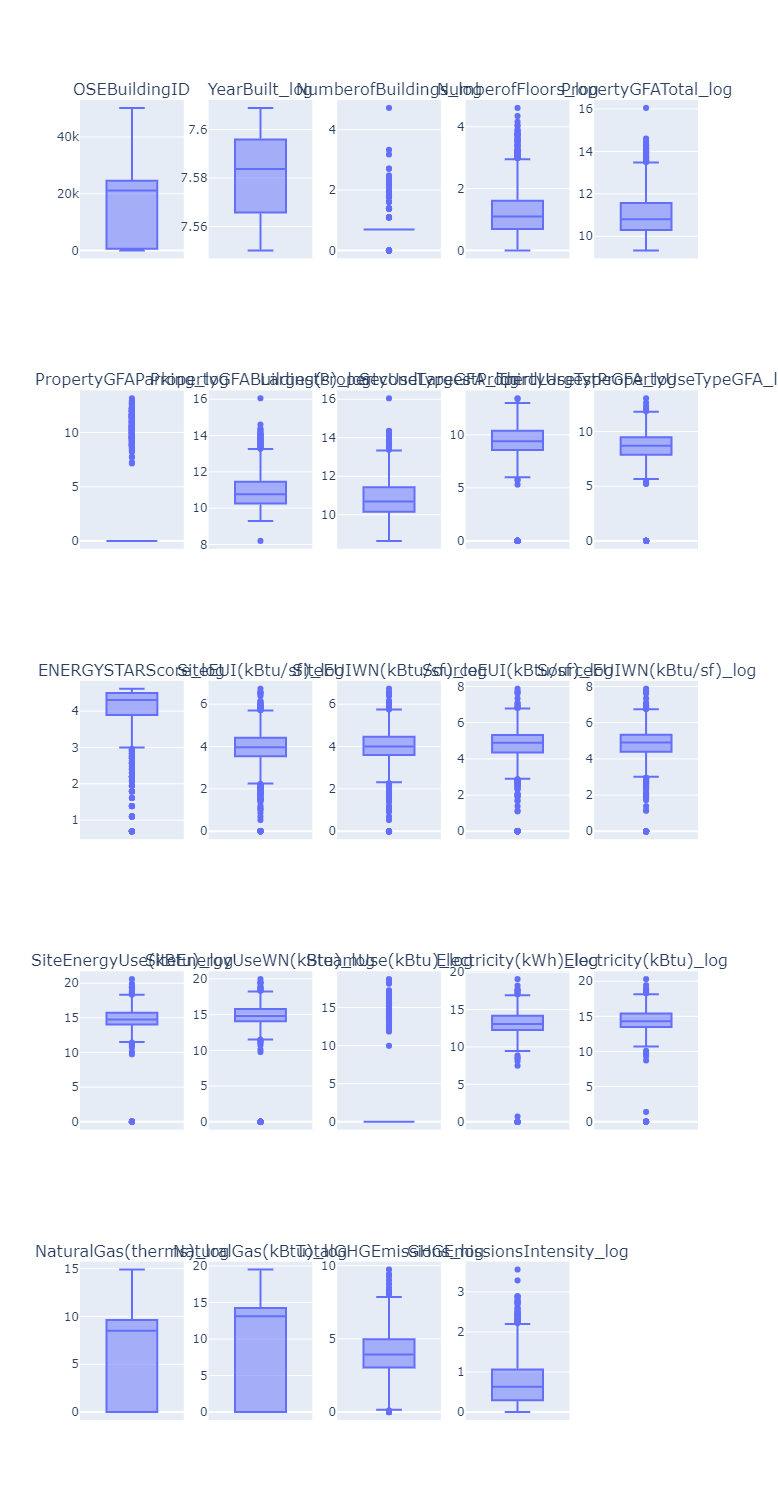

In [143]:
# Nombre de box-plots par ligne
box_plots_per_row = 5

# Nombre total de lignes nécessaires
var_quanti = df_quant_log.columns
total_rows = (len(var_quanti) - 1) // box_plots_per_row + 1

# Création des sous-tracés
fig = make_subplots(rows=total_rows, cols=box_plots_per_row, subplot_titles=var_quanti)

# Affichage des box-plots sur les sous-tracés
for i, var in enumerate(var_quanti):
    row = i // box_plots_per_row + 1
    col = i % box_plots_per_row + 1

    box_fig = px.box(df_quant_log, y=var, title=var)
    box_fig.update_yaxes(title_text=var)

    # Personnalisation des dimensions de la figure
    box_fig.update_layout(
        width=250,  # Largeur de la figure
        height=300,  # Hauteur de la figure
        margin=dict(l=50, r=50, b=50, t=50),  # Marges de la figure
    )

    # Ajout du box-plot au sous-tracé correspondant
    for trace in box_fig.data :
        fig.add_trace(trace, row=row, col=col)

# Mise à jour du layout de la figure principale
fig.update_layout(showlegend=False, height=total_rows * 300, width=box_plots_per_row * 250)

# Affichage de la figure principale
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4. Analyse exploratoire des variables qualitatives</h3>
</div>

## Liste des variables qualitatioves du jeu de donnée

In [185]:
var_quali = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print("les variables qualitatives : \n")
var_quali

les variables qualitatives : 



['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

## Tableau de fréquence des variables qualitatives

In [251]:
for var in var_quali :
    print(df[var].value_counts())
    print("\n")

NonResidential        1458
SPS-District K-12       98
Nonresidential COS      85
Campus                  23
Nonresidential WA        1
Name: BuildingType, dtype: int64


Small- and Mid-Sized Office    291
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             113
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64


DOWNTOWN          

## Test d'indépendance entre les variables qualitatives

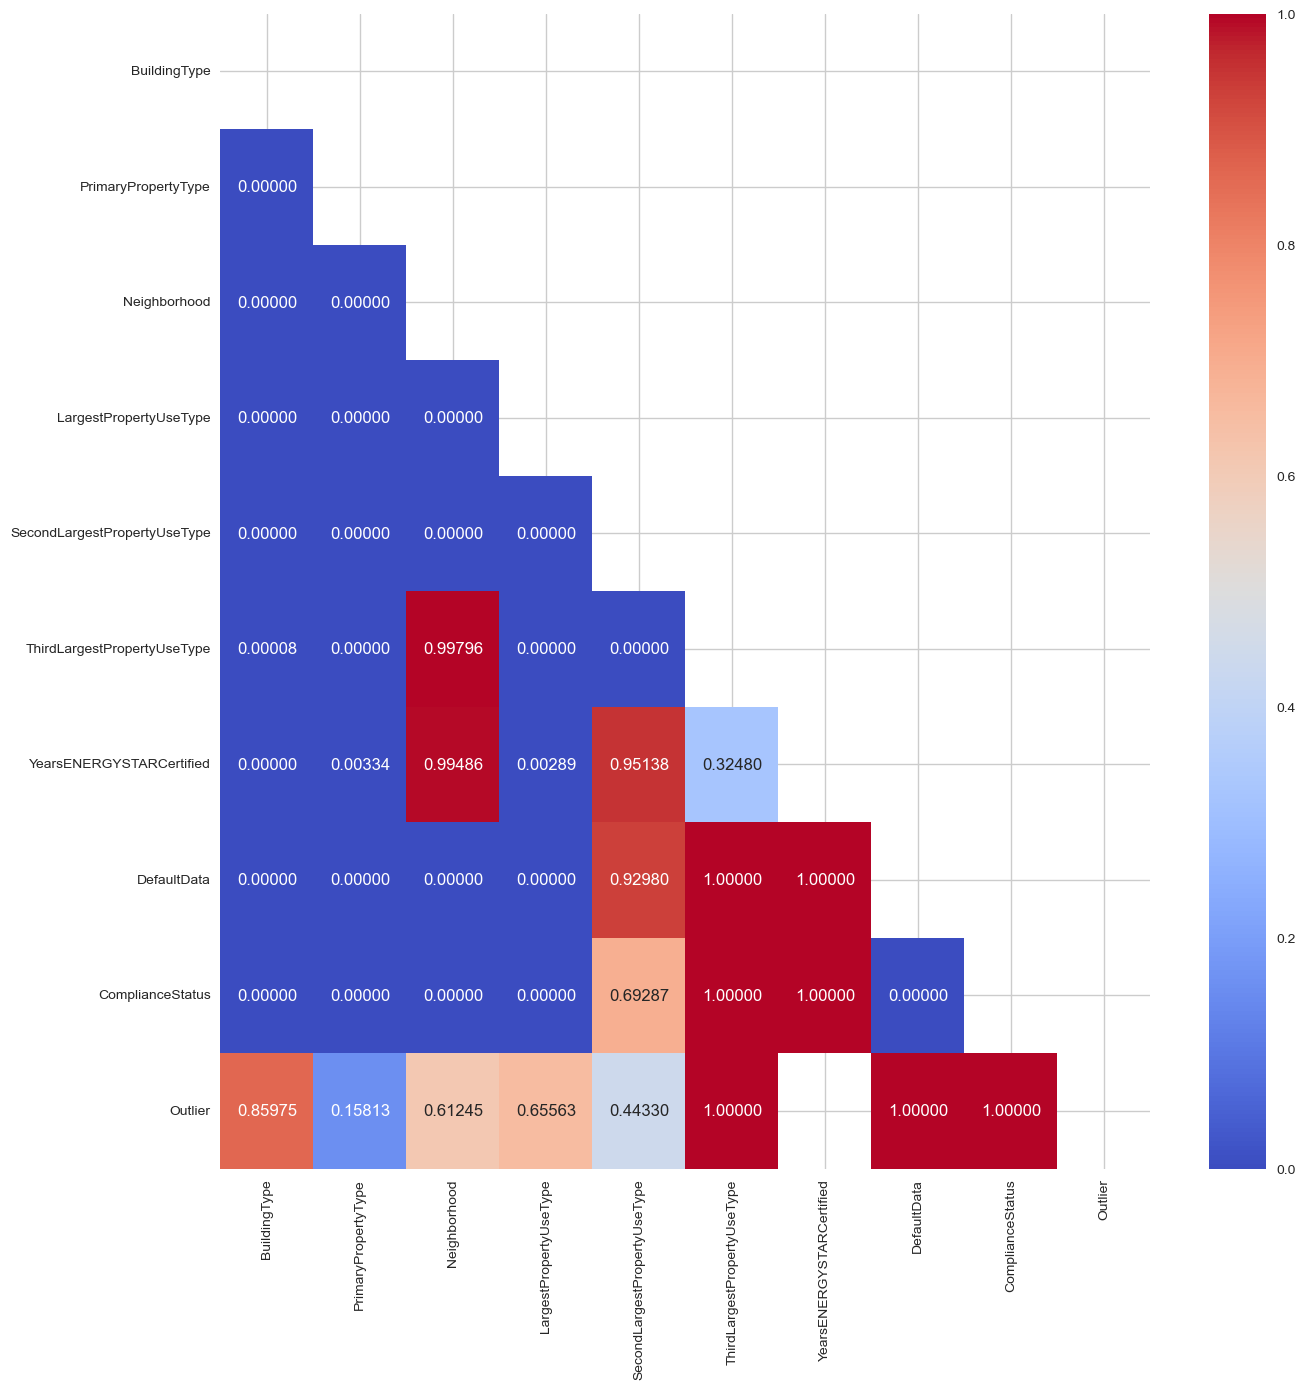

In [217]:
from scipy.stats import chi2_contingency
import seaborn as sns

# Initialiser le tableau pour stocker les p-valeurs
a = np.empty((len(var_quali), len(var_quali)))

# Calculer les p-valeurs pour les tests du chi-deux
for i in range(len(var_quali)):
    for j in range(len(var_quali)):
        tab_df = pd.crosstab(df[var_quali[i]], df[var_quali[j]])

        # Vérifier si le tableau de contingence n'est pas vide
        if tab_df.size > 0:
            _, p_value, _, _ = chi2_contingency(tab_df)
            a[i, j] = p_value
        else:
            a[i, j] = np.nan  # Si le tableau est vide, attribuez une valeur NaN

# Créer un DataFrame avec les p-valeurs
d = pd.DataFrame(a, columns=var_quali, index=var_quali)
d = d.round(5)

mask = np.triu(np.ones_like(d, dtype=bool))
plt.figure(figsize=(15, 15)) 
# Tracer la heatmap
sns.heatmap(d, annot=True, cmap='coolwarm', fmt=".5f",  mask=mask)

# Afficher le graphique
plt.show()


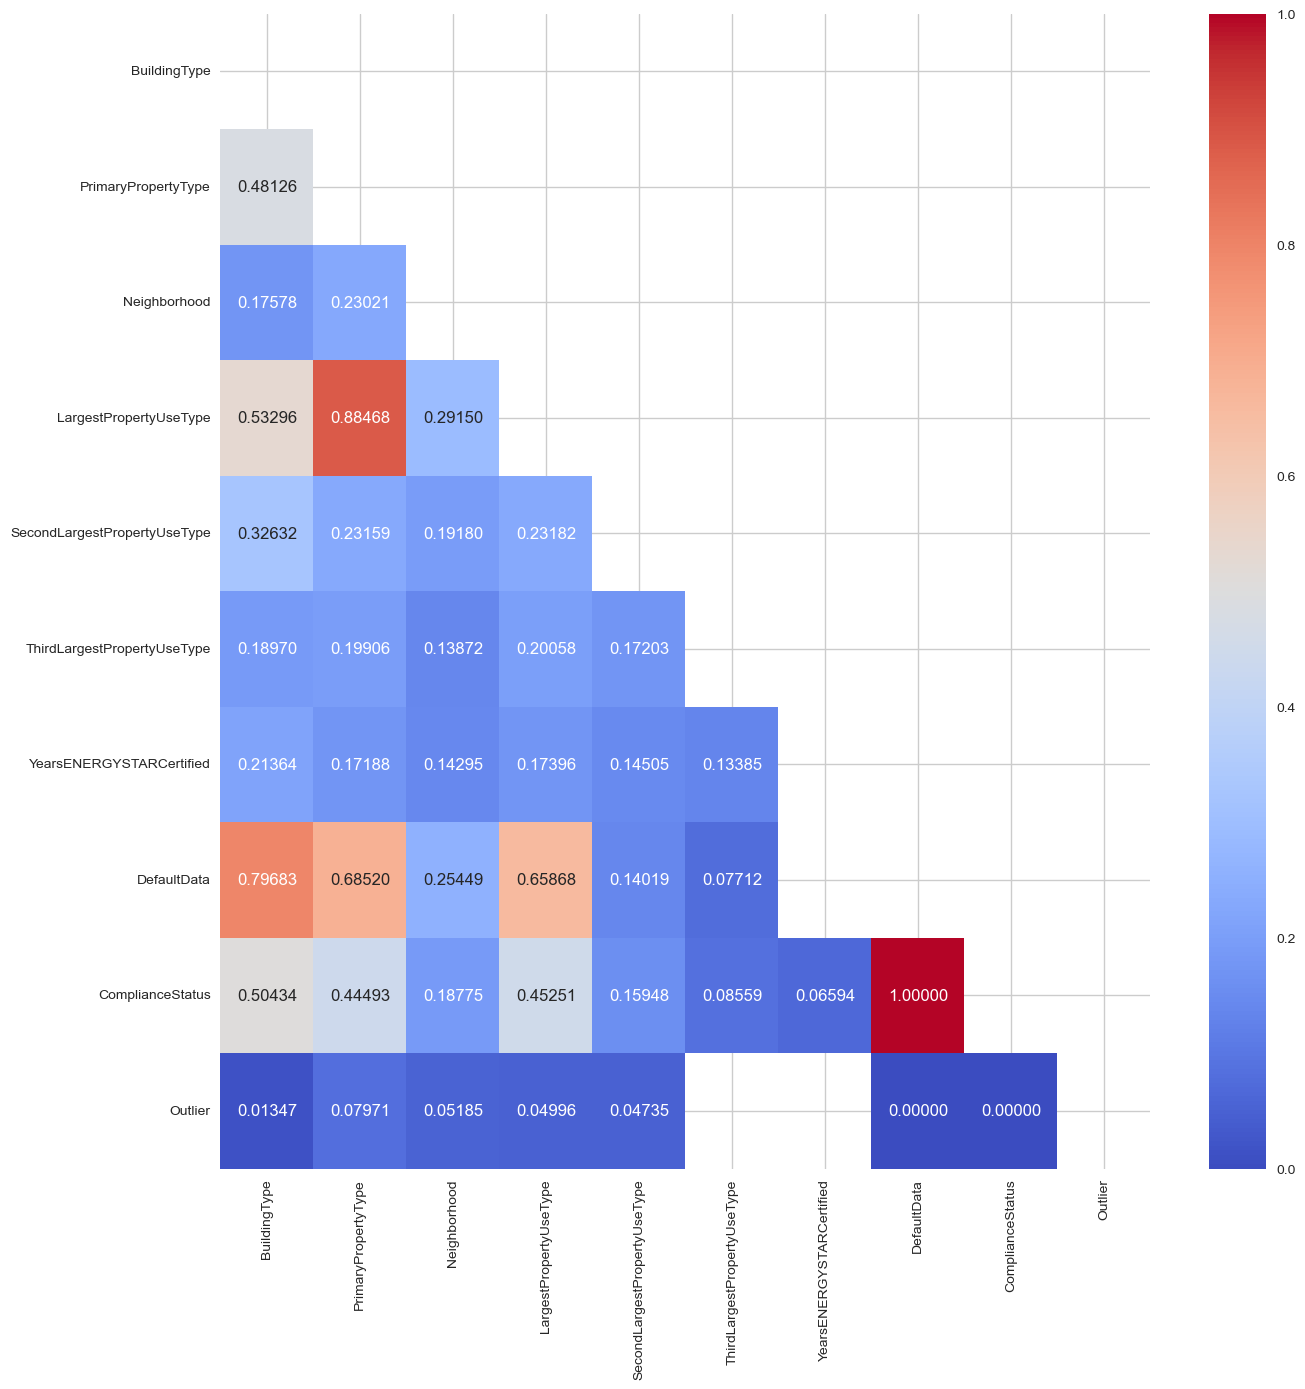

In [220]:
#### Code de chat pour le V de cramer (intensité du lien)
from scipy.stats import chi2_contingency
import seaborn as sns

# Initialiser le tableau pour stocker les p-valeurs
a = np.empty((len(var_quali), len(var_quali)))

# Calculer les p-valeurs pour les tests du chi-deux
for i in range(len(var_quali)):
    for j in range(len(var_quali)):
        tab_df = pd.crosstab(df[var_quali[i]], df[var_quali[j]])

        # Vérifier si le tableau de contingence n'est pas vide
        if (tab_df.size > 0) & (min(tab_df.shape[0] - 1, tab_df.shape[1] - 1) != 0):
            _, _, _, expected = chi2_contingency(tab_df)
            a[i, j] = np.sqrt(chi2_contingency(tab_df)[0] / (len(df) * min(tab_df.shape[0] - 1, tab_df.shape[1] - 1)))
        else:
            a[i, j] = np.nan  # Si le tableau est vide, attribuez une valeur NaN

# Créer un DataFrame avec les p-valeurs
d = pd.DataFrame(a, columns=var_quali, index=var_quali)
d = d.round(5)

mask = np.triu(np.ones_like(d, dtype=bool))
plt.figure(figsize=(15, 15)) 
# Tracer la heatmap
sns.heatmap(d, annot=True, cmap='coolwarm', fmt=".5f",  mask=mask)

# Afficher le graphique
plt.show()

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">L'analyse des test d'indépendance montre une très forte relation entre les variables PrimaryPropertyType et LargestPropertyUseType d'une part et entre les variables DefaultData et ComplianceStatus d'autre part. En effet les p-value obtenues obtenu avec le test de khi-deux sont significatifs au seuil de 1% et avec des statiSstiques V de Cramer respectivement égales à 0,88468 et 1,000.</p>

## Analyse de la variance

In [248]:
from scipy.stats import f_oneway

# Initialiser une liste pour stocker les résultats de l'ANOVA
resultats_anova = []
# Effectuer l'ANOVA pour chaque variable qualitative
for variable_qualitative in var_quali:
    groupes = [groupe[1] for groupe in df.groupby(variable_qualitative)['SiteEnergyUse(kBtu)']]
    resultats = f_oneway(*groupes)
    resultats_anova.append((variable_qualitative, resultats.statistic, resultats.pvalue))
# Créer un DataFrame avec les résultats de l'ANOVA
df_anova = pd.DataFrame(resultats_anova, columns=['SiteEnergyUse(kBtu)', 'Statistique ANOVA', 'P-value'])

# Afficher le DataFrame avec les résultats de l'ANOVA
print(df_anova)

            SiteEnergyUse(kBtu)  Statistique ANOVA       P-value
0                  BuildingType          41.222108  5.550779e-33
1           PrimaryPropertyType          17.817412  3.414255e-59
2                  Neighborhood           1.478319  8.834709e-02
3        LargestPropertyUseType           7.203358  2.300987e-46
4  SecondLargestPropertyUseType           1.918406  3.192026e-04
5   ThirdLargestPropertyUseType           1.053338  3.903592e-01
6      YearsENERGYSTARCertified           2.014906  7.511954e-03
7                   DefaultData           3.052292  8.080788e-02
8              ComplianceStatus           1.492549  2.147141e-01
9                       Outlier         136.799792  6.132568e-09


### Hypothèse de normalité de la quantité d'énergie consommée

In [228]:
import scipy as sp
ShapiroScore = {}
for Var in var_quali :
    y = df['SiteEnergyUse(kBtu)']
    x = df[Var]
    model = ols('y ~ C(x)', data=df).fit()
    ShapiroScore[Var] = sp.stats.shapiro(model.resid)   
ShapiroScore

{'BuildingType': ShapiroResult(statistic=0.2505555748939514, pvalue=0.0),
 'PrimaryPropertyType': ShapiroResult(statistic=0.23449313640594482, pvalue=0.0),
 'Neighborhood': ShapiroResult(statistic=0.22204679250717163, pvalue=0.0),
 'LargestPropertyUseType': ShapiroResult(statistic=0.24862295389175415, pvalue=0.0),
 'SecondLargestPropertyUseType': ShapiroResult(statistic=0.38584768772125244, pvalue=0.0),
 'ThirdLargestPropertyUseType': ShapiroResult(statistic=0.4147959351539612, pvalue=3.517181365668806e-32),
 'YearsENERGYSTARCertified': ShapiroResult(statistic=0.8329999446868896, pvalue=3.806364556879771e-09),
 'DefaultData': ShapiroResult(statistic=0.19775605201721191, pvalue=0.0),
 'ComplianceStatus': ShapiroResult(statistic=0.19796913862228394, pvalue=0.0),
 'Outlier': ShapiroResult(statistic=0.6194368600845337, pvalue=1.6152524040080607e-05)}

In [229]:
import scipy as sp
ShapiroScore = {}
for Var in var_quali :
    y = np.log(df['SiteEnergyUse(kBtu)'])
    x = df[Var]
    model = ols('y ~ C(x)', data=df).fit()
    ShapiroScore[Var] = sp.stats.shapiro(model.resid)   
ShapiroScore

{'BuildingType': ShapiroResult(statistic=nan, pvalue=1.0),
 'PrimaryPropertyType': ShapiroResult(statistic=nan, pvalue=1.0),
 'Neighborhood': ShapiroResult(statistic=nan, pvalue=1.0),
 'LargestPropertyUseType': ShapiroResult(statistic=nan, pvalue=1.0),
 'SecondLargestPropertyUseType': ShapiroResult(statistic=nan, pvalue=1.0),
 'ThirdLargestPropertyUseType': ShapiroResult(statistic=0.9914073348045349, pvalue=0.038667842745780945),
 'YearsENERGYSTARCertified': ShapiroResult(statistic=nan, pvalue=1.0),
 'DefaultData': ShapiroResult(statistic=nan, pvalue=1.0),
 'ComplianceStatus': ShapiroResult(statistic=nan, pvalue=1.0),
 'Outlier': ShapiroResult(statistic=0.8834679126739502, pvalue=0.036204639822244644)}

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Le test de normalité sur les variables linéarisées indique que les résiduits de tous les échantillons sont issus d'une distribution normale</p>

### Hypothèse d'homénéité de la variance

In [234]:
groupes

[Series([], Name: SiteEnergyUse(kBtu), dtype: float64),
 226    17.538779
 517    17.116416
 Name: SiteEnergyUse(kBtu), dtype: float64,
 384     12.672833
 448     16.231060
 839     12.974959
 1045    11.887724
 1229    10.090237
 1295    10.698616
 1611    11.521317
 1945    12.559747
 2129    11.991420
 2189     9.729723
 2216    12.228324
 2410    13.129827
 2450    11.591750
 2801    11.559077
 3152    11.189566
 Name: SiteEnergyUse(kBtu), dtype: float64]

In [246]:
LeveneScore={}
for Var in var_quali :
    x_NonNull = df[Var].notnull()
    y = np.log(df.loc[x_NonNull, 'SiteEnergyUse(kBtu)']+1)
    x = df.loc[x_NonNull, Var]
    modalite =x.unique()
    groupes = []
    for mdl in modalite :
        groupes.append(y[x==mdl])
    LeveneScore[Var]=sp.stats.levene(*groupes)

LeveneScore

{'BuildingType': LeveneResult(statistic=21.875270320155224, pvalue=1.2948728958151957e-17),
 'PrimaryPropertyType': LeveneResult(statistic=5.4551819401466, pvalue=2.6579447455938544e-14),
 'Neighborhood': LeveneResult(statistic=1.9208372659665292, pvalue=0.011292026583568099),
 'LargestPropertyUseType': LeveneResult(statistic=2.298454164692473, pvalue=3.3663972530200905e-07),
 'SecondLargestPropertyUseType': LeveneResult(statistic=0.9151836240374395, pvalue=0.6344149848052749),
 'ThirdLargestPropertyUseType': LeveneResult(statistic=1.4722552938214066, pvalue=0.04146792637846526),
 'YearsENERGYSTARCertified': LeveneResult(statistic=0.26171535004998214, pvalue=0.999990876418858),
 'DefaultData': LeveneResult(statistic=7.352652444932517, pvalue=0.00676532272853267),
 'ComplianceStatus': LeveneResult(statistic=19.941379007970518, pvalue=1.0660902601234842e-12),
 'Outlier': LeveneResult(statistic=1.032177247793339, pvalue=0.32575589479234235)}

In [247]:
## Significativité 
LeveneScoreSign = []
for Var in var_quali :
    if LeveneScore[Var][1]>0.05 :
        LeveneScoreSign.append(Var)
LeveneScoreSign

['SecondLargestPropertyUseType', 'YearsENERGYSTARCertified', 'Outlier']

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Au seuil de 5%, le test d'homogénéité de la variance est non significatif pour les variables SecondLargestPropertyUseType, YearsENERGYSTARCertified et Outlier. Ce qui indique une homogénéité des variances entre les groupes de ces 03 variances.</p>

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Ainsi, d'après les résultats de l'ANOVA, nous pouvons conclure que ces variables ont une influent significative sur notre variable à prédire.</P>

### Test non paramétrique

In [249]:
KruskalScore ={}
for Var in var_quali :
    x_NonNull = df[Var].notnull()
    y = np.log(df.loc[x_NonNull, 'SiteEnergyUse(kBtu)']+1)
    x = df.loc[x_NonNull, Var]
    modalite = x.unique()
    groupes = []
    for mdl in modalite :
        groupes.append(y[x==mdl])
    KruskalScore[Var]=sp.stats.kruskal(*groupes)
    
KruskalScore

{'BuildingType': KruskalResult(statistic=32.90755412778007, pvalue=1.2476846702512063e-06),
 'PrimaryPropertyType': KruskalResult(statistic=672.3795452414856, pvalue=9.021184001918374e-129),
 'Neighborhood': KruskalResult(statistic=156.27021402332952, pvalue=4.4650845130898994e-24),
 'LargestPropertyUseType': KruskalResult(statistic=503.5712501954668, pvalue=1.0162361840533234e-73),
 'SecondLargestPropertyUseType': KruskalResult(statistic=171.33527849711754, pvalue=2.4709262805232087e-16),
 'ThirdLargestPropertyUseType': KruskalResult(statistic=80.5577503471311, pvalue=6.851639751385589e-05),
 'YearsENERGYSTARCertified': KruskalResult(statistic=57.186456400742145, pvalue=0.04780584595063833),
 'DefaultData': KruskalResult(statistic=3.610575582380881, pvalue=0.05741324575418396),
 'ComplianceStatus': KruskalResult(statistic=65.19155951711704, pvalue=4.564396481551748e-14),
 'Outlier': KruskalResult(statistic=5.0, pvalue=0.025347318677468325)}

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Au seuil de 5%, toute les variables qualitatives semblent avoir une influence significative sur notre variable à prédire, à l'exception de la variable DefaultData.</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.5. Choix des variables pour la modèle</h3>
</div>

In [256]:
var_model = ['OSEBuildingID', 'BuildingType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 
        'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'ComplianceStatus', 
        'ENERGYSTARScore', 'Outlier', 'SiteEnergyUse(kBtu)'
       ]

In [263]:
df[var_model].head(10)

OSEBuildingID        BuildingType Neighborhood  YearBuilt  \
0               1      NonResidential     DOWNTOWN       1927   
1               2      NonResidential     DOWNTOWN       1996   
2               3      NonResidential     DOWNTOWN       1969   
3               5      NonResidential     DOWNTOWN       1926   
4               8      NonResidential     DOWNTOWN       1980   
5               9  Nonresidential COS     DOWNTOWN       1999   
6              10      NonResidential     DOWNTOWN       1926   
7              11      NonResidential     DOWNTOWN       1926   
8              12      NonResidential     DOWNTOWN       1904   
10             15      NonResidential     DOWNTOWN       1969   

    NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                 1.0              12                   0   
1                 1.0              11               15064   
2                 1.0              41              196718   
3                 1.0              10                   0   
4                 1.0              18               62000   
5                 1.0               2               37198   
6                 1.0              11                   0   
7                 1.0               8                   0   
8                 1.0              15                   0   
10                1.0              11               19279   

    PropertyGFABuilding(s)                 LargestPropertyUseType  \
0                    88434                                  Hotel   
1                    88502                                  Hotel   
2                   759392                                  Hotel   
3                    61320                                  Hotel   
4                   113580                                  Hotel   
5                    60090                         Police Station   
6                    83008                                  Hotel   
7                   102761  Other - Entertainment/Public Assembly   
8                   163984                                  Hotel   
10                  133884                                  Hotel   

    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                     88434.0                          NaN   
1                     83880.0                      Parking   
2                    756493.0                          NaN   
3                     61320.0                          NaN   
4                    123445.0                      Parking   
5                     88830.0                          NaN   
6                     81352.0                          NaN   
7                    102761.0                          NaN   
8                    163984.0                          NaN   
10                   133884.0                          NaN   

    SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                               NaN                         NaN   
1                           15064.0                  Restaurant   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                           68009.0               Swimming Pool   
5                               NaN                         NaN   
6                               NaN                         NaN   
7                               NaN                         NaN   
8                               NaN                         NaN   
10                              NaN                         NaN   

    ThirdLargestPropertyUseTypeGFA ComplianceStatus  ENERGYSTARScore Outlier  \
0                              NaN        Compliant             60.0     NaN   
1                           4622.0        Compliant             61.0     NaN   
2                              NaN        Compliant             43.0     NaN   
3                              NaN        Compliant             56.0     NaN   
4                              0.0 

In [ ]:
## Enrégistrer les données pour la modélisation
df[var_model].to_csv(Path(DATA_DIR, "data_final.csv"), index=False)

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Modélisation</h1>
</div>

In [428]:
# Modèles
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.base import clone
from sklearn.compose import make_column_selector as selector

# Métrics
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import check_array

# Cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [429]:
# Chargement des données
data = pd.read_csv(Path(DATA_DIR, "data_final.csv"), sep =",")
#data = data.drop('OSEBuildingID', axis = 1)
var_quanti = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
var_quali = data.select_dtypes(include=['object', 'bool']).columns.tolist()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1665 non-null   int64  
 1   BuildingType                     1665 non-null   object 
 2   Neighborhood                     1665 non-null   object 
 3   YearBuilt                        1665 non-null   int64  
 4   NumberofBuildings                1665 non-null   float64
 5   NumberofFloors                   1665 non-null   int64  
 6   PropertyGFAParking               1665 non-null   int64  
 7   PropertyGFABuilding(s)           1665 non-null   int64  
 8   LargestPropertyUseType           1665 non-null   object 
 9   LargestPropertyUseTypeGFA        1665 non-null   float64
 10  SecondLargestPropertyUseType     854 non-null    object 
 11  SecondLargestPropertyUseTypeGFA  854 non-null    float64
 12  ThirdLargestProperty

## Fonctions

In [430]:
def get_all_performances(value_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
   
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [431]:
METRICS = [metrics.r2_score,
           metrics.mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error,
          ]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1. Définition des pipline</h3>
</div>

In [432]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector as selector
import numpy as np
from category_encoders.target_encoder import TargetEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

### Pipeline pour les variables quantitatives

In [433]:
# Supposons que vous ayez une fonction log personnalisée
def custom_log(x):
    return np.log1p(x)  # Utilisez log1p pour éviter les problèmes avec les valeurs nulles

# Créer une fonction de transformation pour appliquer log en option
def optional_log_transform(X, apply_log=True):
    if apply_log:
        return np.log1p(X)  # Appliquer log si apply_log est True
    else:
        return X

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Inputation des valeurs manquantes
    #('attribs_combined', CombinedAttributesAdder()),  # Feature engineering
    ('log_transform', FunctionTransformer(optional_log_transform)),  # Transformation log optionnelle
    ('std_scaler', StandardScaler()),  # Normalisation des données
])


### Pipeline pour les variables qualitatives

In [434]:
# Pipeline pour les variables catégorielles
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NotApplicable')),  # Inputation des valeurs manquantes
    ('target', TargetEncoder()),
    ('std_scaler', StandardScaler()), # Normalisation des données
    ])

### Pipeline des transformations globales

In [435]:
# Labelize les variables catégorielles et les ajoute aux variables numériques transformés
full_pipeline = ColumnTransformer([
        ("num", num_pipeline,  selector(dtype_exclude="object")),
        ("cat", cat_pipeline,  selector(dtype_include="object"))
    ])
## Avec EnergyScore
full_pipeline_est = ColumnTransformer([
        ("num", num_pipeline,  selector(dtype_exclude="object")),
        ("cat", cat_pipeline,  selector(dtype_include="object"))
    ])

In [436]:
def define_pipeline(regressor, energyscore = False) :
    if energyscore :
        # Assembly of preprocessor and regressor
        pipe = Pipeline([("preprocess", full_pipeline_est),
                    ("regressor", regressor)
                    ])
    else :
        # Assembly of preprocessor and regressor
        pipe = Pipeline([("preprocess", full_pipeline),
                    ("regressor", regressor)
                    ])
    return pipe

### Echantillon Train & Test

#### Sans EnergyStarScore 

In [437]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data.loc[:, var_quali[:-1] + var_quanti[1:-2]]  
y = data.loc[:, 'SiteEnergyUse(kBtu)']

In [438]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 25% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train, y_test = np.log1p(y_train), np.log1p(y_test)

#### Avec EnergyStarScore

In [439]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X_est = data.loc[data['ENERGYSTARScore'].notnull(), var_quali[:-1] + var_quanti[1:-1]]  
y_est = data.loc[data['ENERGYSTARScore'].notnull(), 'SiteEnergyUse(kBtu)']

In [440]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 25% des données dans le jeu de test
X_est_train, X_est_test, y_est_train, y_est_test = train_test_split(X_est, y_est, test_size=0.25, random_state=42)
y_est_train, y_est_test = np.log1p(y_est_train), np.log1p(y_est_test)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2. Implémentation des modèles</h3>
</div>

In [441]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    #print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">3.2.1. Regression linéaire</h4>
</div>

### Pipeline du modèle linéaire

In [56]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
reg_pipe = define_pipeline(linear_model.LinearRegression())
# Avec
reg_pipe_est = define_pipeline(linear_model.LinearRegression(), energyscore = True)
reg_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000218CEACD070>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('target',
                                                                   TargetEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000218CEACD4C0>)])),
                ('regressor', LinearRegression())])

### Entrainement du modèle sans énergie score

In [104]:
# Train linear model sans energyscore
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 1.63919


In [105]:
# get performances in train & test (Sans EnergyStarScore)
get_all_performances(value_train=(y_train, lr_pipe.predict(X_train)),
                     values_test=(y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS
                    )

metric         train          test
0                        r2_score  8.501548e-01  5.760229e-01
1              mean_squared_error  5.766865e-01  1.639187e+00
2  mean_absolute_percentage_error  2.133427e+13  3.160400e+14
3                       max_error  3.884790e+00  1.526579e+01

### Entrainement du modèle avec énergie score

In [59]:
# Train linear model avec energyscore
lr_results_est = train_model(model=reg_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 0.31952


In [338]:
# get performances in train & test (Avec EnergyStarScore)
get_all_performances(value_train=(y_est_train, lr_pipe_est.predict(X_est_train)),
                     values_test=(y_est_test, lr_pipe_est.predict(X_est_test)),
                     metrics=METRICS
                    )

metric         train      test
0                        r2_score  7.213107e-01  0.803837
1              mean_squared_error  5.353997e-01  0.319521
2  mean_absolute_percentage_error  7.592812e+13  0.029261
3                       max_error  1.382473e+01  2.527141

### Sélection des variables

#### Sans EnergyStarScore

In [151]:
## Premier test de la methode
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lr_pipe, n_features_to_select=10)  # Vous pouvez ajuster le nombre de caractéristiques selon vos besoins
rfe_pipe = Pipeline([
    ("preprocess", full_pipeline),
    ("feature_selection", RFE(estimator=linear_model.LinearRegression(), n_features_to_select=10)),
    ("regressor", linear_model.LinearRegression())
])
rfe_results = train_model(model=rfe_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
rfe_pipe = rfe_results["estimator"]

selected_features = X_train.columns[rfe_pipe.named_steps['feature_selection'].support_]
selected_features

Index(['BuildingType', 'Neighborhood', 'LargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ComplianceStatus', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

In [379]:
## Meilleure combinaisons des paramètres
nombre = []
error_test = []
error_train = []
selected_features = []
rfe_pipe_list = []
for i in range(5,len(X.columns)):
    rfe = RFE(estimator=lr_pipe, n_features_to_select=i)  # Vous pouvez ajuster le nombre de caractéristiques selon vos besoins
    rfe_pipe = Pipeline([
        ("preprocess", full_pipeline),
        ("feature_selection", RFE(estimator=linear_model.LinearRegression(), n_features_to_select=i)),
        ("regressor", linear_model.LinearRegression())
    ])
    rfe_results = train_model(model=rfe_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
    nombre.append(i)
    error_train.append(rfe_results["error_train"])
    error_test.append(rfe_results["error_test"])
    selected_features.append(X_train.columns[rfe_pipe.named_steps['feature_selection'].support_])
    rfe_pipe_list.append(rfe_results["estimator"])
    
erreur_df = pd.DataFrame({
    'nbr_caract': nombre,
    'error_train': error_train,
    'error_test' : error_test
})

print(erreur_df)

   nbr_caract  error_train  error_test
0           5     0.602929    1.653846
1           6     0.595032    1.635338
2           7     0.587014    1.638120
3           8     0.580316    1.624677
4           9     0.578855    1.629558
5          10     0.577211    1.638786
6          11     0.576757    1.639348
7          12     0.576718    1.639432
8          13     0.576697    1.639151


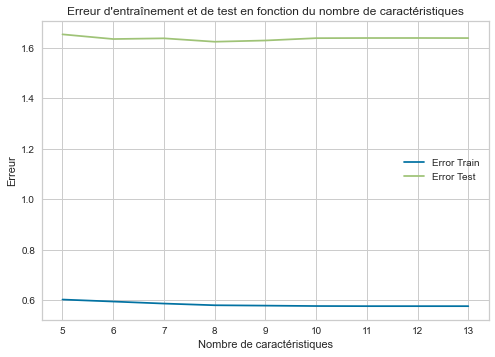

In [380]:
## Représentation graphique

# Triez le DataFrame par 'nbr_caract' pour une représentation correcte
erreur_df = erreur_df.sort_values(by='nbr_caract')

# Créez un graphique avec 'nbr_caract' sur l'axe des abscisses
plt.plot(erreur_df['nbr_caract'], erreur_df['error_train'], label='Error Train')
plt.plot(erreur_df['nbr_caract'], erreur_df['error_test'], label='Error Test')

# Ajoutez des étiquettes et une légende
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('Erreur')
plt.title('Erreur d\'entraînement et de test en fonction du nombre de caractéristiques')
plt.legend()

# Affichez le graphique
plt.show()


<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Le nombre de variables optimal à sélectionner correspond à 8.</p>

In [189]:
lr_results_new = train_model(model=rfe_pipe_list[3],
                       x_train=X_train[selected_features[3]], y_train=y_train,
                       x_test=X_test[selected_features[3]], y_test=y_test)
lr_pipe_new = lr_results_new["estimator"]

print("Erreur sur l'echantillon test est : ", lr_results_new["error_test"])
print('\n')
print("les variables sélectionnées sont :") 
print(selected_features[3])

Erreur sur l'echantillon test est :  1.7281444908134747


les variables sélectionnées sont :
Index(['BuildingType', 'Neighborhood', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFABuilding(s)', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Les variables les plus pertinentes pour notre modèle sont : BuildingType, Neighborhood, ThirdLargestPropertyUseType, ComplianceStatus, NumberofBuildings, NumberofFloors, PropertyGFABuilding(s), ThirdLargestPropertyUseTypeGFA.</p>

Sélection avec un cross-validation

In [192]:
## Sélection avec cv = 5

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

rfecv_pipe = Pipeline([
    ("preprocess", full_pipeline),
    ("feature_selection", RFECV(estimator=LinearRegression(), cv=5)),  # cv=5 pour 5-fold cross-validation
    ("regressor", linear_model.LinearRegression())
])

rfe_results_cv = train_model(model=rfecv_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
rfe_pipe_cv = rfe_results_cv["estimator"]

selected_features_cv = X_train.columns[rfe_pipe_cv.named_steps['feature_selection'].support_]
selected_features_cv

print(rfe_results_cv["error_test"])
print(selected_features_cv)

1.639432387378328
Index(['BuildingType', 'Neighborhood', 'LargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ComplianceStatus', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


In [381]:
## Test du de la valeur de cv optimale
cv_list = []
nbr_var = []
list_var = []
error_train = []
error_test = []
modele_list = []
for i in range(2, 11):
    rfecv_pipe = Pipeline([
        ("preprocess", full_pipeline),
        ("feature_selection", RFECV(estimator=LinearRegression(), cv=i)),  # cv=5 pour 5-fold cross-validation
        ("regressor", linear_model.LinearRegression())
    ])

    rfe_results_cv = train_model(model=rfecv_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
    rfe_pipe_cv = rfe_results_cv["estimator"]
    
    cv_list.append(i)
    nbr_var.append(len(X_train.columns[rfe_pipe_cv.named_steps['feature_selection'].support_]))
    error_test.append(rfe_results_cv["error_test"])
    error_train.append(rfe_results_cv["error_train"])
    list_var.append(X_train.columns[rfe_pipe_cv.named_steps['feature_selection'].support_])
    modele_list.append(rfe_pipe_cv)

df_cv = pd.DataFrame({
    'nombre_cv': cv_list,
    'nombre_variable_select' : nbr_var,
    'error_train': error_train,
    'error_test' : error_test
})

print(df_cv)

   nombre_cv  nombre_variable_select  error_train  error_test
0          2                      10     0.577211    1.638786
1          3                      11     0.576757    1.639348
2          4                      10     0.577211    1.638786
3          5                      12     0.576718    1.639432
4          6                      10     0.577211    1.638786
5          7                      11     0.576757    1.639348
6          8                       8     0.580316    1.624677
7          9                       8     0.580316    1.624677
8         10                       8     0.580316    1.624677


In [382]:
print(list_var[6])
modele_list[6]

Index(['BuildingType', 'Neighborhood', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFABuilding(s)', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021...AC0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('target',
                                                                   TargetEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000218D6126310>)])),
                ('feature_selection',
                 RFECV(cv=8, estimator=LinearRegression())),
                ('regressor', LinearRegression())])

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Les performances du modèle sur les echantillons Train et Test évalué pour plusieurs valeurs de cv indiquent que le nombre optimal de variables pertinentes est 8. Il s'agit des variables : BuildingType, Neighborhood, ThirdLargestPropertyUseType, ComplianceStatus, NumberofBuildings, NumberofFloors, PropertyGFABuilding(s), ThirdLargestPropertyUseTypeGFA. Les mêmes que précédement !</p>

#### Avec EnergyStarScore

In [155]:
## Premier test de la methode
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

rfe_est = RFE(estimator=lr_pipe_est, n_features_to_select=10)  # Vous pouvez ajuster le nombre de caractéristiques selon vos besoins
rfe_pipe_est = Pipeline([
    ("preprocess", full_pipeline_est),
    ("feature_selection", RFE(estimator=linear_model.LinearRegression(), n_features_to_select=10)),
    ("regressor", linear_model.LinearRegression())
])
rfe_results_est = train_model(model=rfe_pipe_est, x_train=X_est_train, y_train=y_est_train, x_test=X_est_test, y_test=y_est_test)
rfe_pipe_est = rfe_results_est["estimator"]

selected_features_est = X_est_train.columns[rfe_pipe_est.named_steps['feature_selection'].support_]
selected_features_est

Index(['Neighborhood', 'ThirdLargestPropertyUseType', 'ComplianceStatus',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'LargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore'],
      dtype='object')

In [184]:
## Meilleure combinaisons des paramètres
nombre_est = []
error_test_est = []
error_train_est = []
selected_features_est = []
rfe_pipe_est_list = []
for i in range(4,len(X_est.columns)):
    rfe_est = RFE(estimator=lr_pipe_est, n_features_to_select=i)  # Vous pouvez ajuster le nombre de caractéristiques selon vos besoins
    rfe_pipe_est = Pipeline([
        ("preprocess", full_pipeline_est),
        ("feature_selection", RFE(estimator=linear_model.LinearRegression(), n_features_to_select=i)),
        ("regressor", linear_model.LinearRegression())
    ])
    rfe_results_est = train_model(model=rfe_pipe_est, x_train=X_est_train, y_train=y_est_train, x_test=X_est_test, y_test=y_est_test)
    nombre_est.append(i)
    error_train_est.append(rfe_results_est["error_train"])
    error_test_est.append(rfe_results_est["error_test"])
    selected_features_est.append(X_est_train.columns[rfe_pipe_est.named_steps['feature_selection'].support_])
    rfe_pipe_est_list.append(rfe_results_est["estimator"])
    
erreur_df_est = pd.DataFrame({
    'nbr_caract': nombre_est,
    'error_train': error_train_est,
    'error_test' : error_test_est
})

print(erreur_df_est)

    nbr_caract  error_train  error_test
0            4     0.555804    0.314536
1            5     0.551601    0.318189
2            6     0.548954    0.321733
3            7     0.547838    0.318025
4            8     0.543374    0.322659
5            9     0.542532    0.322846
6           10     0.540684    0.320275
7           11     0.539550    0.317812
8           12     0.538493    0.318378
9           13     0.537657    0.318937
10          14     0.535898    0.321118


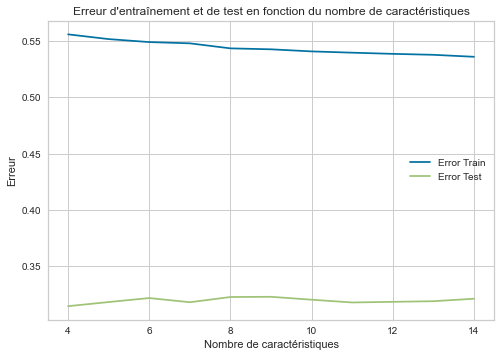

In [185]:
## Représentation graphique

# Créez un graphique avec 'nbr_caract' sur l'axe des abscisses
plt.plot(erreur_df_est['nbr_caract'], erreur_df_est['error_train'], label='Error Train')
plt.plot(erreur_df_est['nbr_caract'], erreur_df_est['error_test'], label='Error Test')

# Ajoutez des étiquettes et une légende
plt.xlabel('Nombre de caractéristiques')
plt.ylabel('Erreur')
plt.title('Erreur d\'entraînement et de test en fonction du nombre de caractéristiques')
plt.legend()

# Affichez le graphique
plt.show()

<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Le nombre de variables optimal à sélectionner correspond à 11.</p>

In [191]:
lr_results_est_new = train_model(model=rfe_pipe_est_list[7],
                       x_train=X_est_train[selected_features_est[7]], y_train=y_est_train,
                       x_test=X_est_test[selected_features_est[7]], y_test=y_est_test)

lr_pipe_est_new = lr_results_est_new["estimator"]
lr_results_est_new["error_test"]

print("Erreur sur l'echantillon test est : ", lr_results_est_new["error_test"])
print('\n')
print("les variables sélectionnées sont :") 
print(selected_features_est[7])

Erreur sur l'echantillon test est :  0.34239656882920544


les variables sélectionnées sont :
Index(['Neighborhood', 'LargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'LargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore'],
      dtype='object')


<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Les variables les plus pertinentes pour notre modèle sont : Neighborhood, LargestPropertyUseType, ThirdLargestPropertyUseType, ComplianceStatus, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFAParking, LargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore.</p>

Sélection avec un cross-validation

In [176]:
rfecv_pipe_est = Pipeline([
    ("preprocess", full_pipeline_est),
    ("feature_selection", RFECV(estimator=LinearRegression(), cv=5)),  # cv=5 pour 5-fold cross-validation
    ("regressor", linear_model.LinearRegression())
])

rfe_results_cv_est = train_model(model=rfecv_pipe_est, x_train=X_est_train, y_train=y_est_train, x_test=X_est_test, y_test=y_est_test)
rfe_pipe_cv_est = rfe_results_cv_est["estimator"]

selected_features_cv_est = X_est_train.columns[rfe_pipe_cv_est.named_steps['feature_selection'].support_]
selected_features_cv_est

print(rfe_results_cv_est["error_test"])
print(selected_features_cv_est)

0.31952097969867743
Index(['BuildingType', 'Neighborhood', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ComplianceStatus', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore'],
      dtype='object')


In [391]:
## Test du de la valeur de cv optimale
cv_list_est = []
nbr_var_est = []
list_var_est = []
error_train_est = []
error_test_est = []
modele_list_est = []
for i in range(2,11):
    rfecv_pipe_est = Pipeline([
        ("preprocess", full_pipeline_est),
        ("feature_selection", RFECV(estimator=LinearRegression(), cv=i)),  # cv=5 pour 5-fold cross-validation
        ("regressor", linear_model.LinearRegression())
    ])

    rfe_results_cv_est = train_model(model=rfecv_pipe_est, x_train=X_est_train, y_train=y_est_train, x_test=X_est_test, y_test=y_est_test)
    rfe_pipe_cv_est = rfe_results_cv_est["estimator"]

    selected_features_cv_est = X_est_train.columns[rfe_pipe_cv_est.named_steps['feature_selection'].support_]
    selected_features_cv_est
        
    cv_list_est.append(i)
    nbr_var_est.append(len(X_est_train.columns[rfe_pipe_cv_est.named_steps['feature_selection'].support_]))
    error_test_est.append(rfe_results_cv_est["error_test"])
    error_train_est.append(rfe_results_cv_est["error_train"])
    list_var_est.append(X_est_train.columns[rfe_pipe_cv_est.named_steps['feature_selection'].support_])
    modele_list_est.append(rfe_pipe_cv_est)

df_cv_est = pd.DataFrame({
    'nombre_cv': cv_list_est,
    'nombre_variable_select' : nbr_var_est,
    'error_train': error_train_est,
    'error_test' : error_test_est
})

print(df_cv_est)

   nombre_cv  nombre_variable_select  error_train  error_test
0          2                      15     0.535400    0.319521
1          3                       4     0.555804    0.314536
2          4                      15     0.535400    0.319521
3          5                       4     0.555804    0.314536
4          6                      15     0.535400    0.319521
5          7                      15     0.535400    0.319521
6          8                      15     0.535400    0.319521
7          9                       4     0.555804    0.314536
8         10                       4     0.555804    0.314536


In [202]:
print(list_var_est[3])

Index(['ThirdLargestPropertyUseType', 'ComplianceStatus', 'NumberofFloors',
       'LargestPropertyUseTypeGFA'],
      dtype='object')


### Optimisation des hyperparamètres

In [204]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV

#### Sans EnergyStarScore

In [383]:
param_grid = {
    "regressor__fit_intercept": [True, False],
}
reg_pipe_OptVar_cv = modele_list[6]
grid_search = GridSearchCV(reg_pipe_OptVar_cv, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_col...
                                                                                                        strategy='constant')),
                                                                                         ('target',
                                                                                          TargetEncoder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000218D6126310>)])),
                                       ('feature_selection',
                                        RFECV(cv=8,
                                              estimator=LinearRegression())),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [384]:
grid_search.fit(X_train[list_var[6]], y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'regressor__fit_intercept': True}


In [385]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

Internal CV score:  0.717


In [386]:
grid_cv_results = grid_search.cv_results_

In [387]:
pd.DataFrame(grid_cv_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.465011      0.119209         0.040794        0.004798   
1       0.423730      0.034674         0.045179        0.005251   

  param_regressor__fit_intercept                               params  \
0                           True   {'regressor__fit_intercept': True}   
1                          False  {'regressor__fit_intercept': False}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.681703           0.526138           0.793144           0.916143   
1        -106.725317        -155.668018         -61.860287         -17.589412   

   ...  split2_train_score  split3_train_score  split4_train_score  \
0  ...            0.813227            0.731489            0.804994   
1  ...          -55.213968          -73.949012          -59.897109   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.817098            0.824716            0.809733   
1          -54.143010          -52.071208          -55.754185   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.817906            0.821622          0.808209         0.026198  
1          -55.212451          -53.084782        -56.426469         6.241175  

[2 rows x 31 columns]

In [224]:
np.exp(grid_search.predict(X_test[list_var[6]]))

array([1.05311073e+06, 9.61815274e+05, 3.57752344e+06, 1.17873894e+06,
       3.79962590e+06, 3.27112710e+06, 3.18228831e+05, 2.15003039e+07,
       3.72285700e+06, 7.62163587e+06, 1.18992035e+08, 4.53533307e+06,
       1.20821925e+06, 5.67045013e+06, 1.54450119e+07, 5.99589184e+06,
       1.31415661e+07, 5.33638033e+06, 4.67515445e+06, 5.85195517e+05,
       4.39584078e+06, 1.04831941e+06, 3.23833944e+06, 1.07538102e+06,
       1.09820985e+08, 1.87323314e+06, 3.68197453e+06, 1.28546470e+07,
       5.05492586e+06, 2.01914463e+06, 1.21283886e+07, 3.09554718e+06,
       2.01311793e+06, 1.34161854e+06, 5.31007617e+06, 1.63882057e+06,
       9.71293179e+06, 1.38385394e+07, 7.88575323e+06, 2.28503144e+06,
       7.50901141e+06, 1.70106049e+06, 1.77833476e+06, 7.52955715e+06,
       1.71077004e+06, 1.95939562e+06, 1.05659668e+06, 2.49991453e+06,
       1.42022060e+06, 1.39174735e+06, 2.32157328e+06, 1.92441348e+06,
       1.23508259e+06, 4.25767035e+06, 4.64462810e+06, 1.71003188e+07,
      

In [388]:
df_feature_importance = pd.DataFrame(reg_pipe_OptVar_cv[-1].coef_, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head(8)

Shape: (8, 1)


coef
BuildingType                    0.096517
Neighborhood                    0.085103
ThirdLargestPropertyUseType     0.416121
ComplianceStatus                0.437047
NumberofBuildings               0.104211
NumberofFloors                 -0.312921
PropertyGFABuilding(s)          0.405597
ThirdLargestPropertyUseTypeGFA  1.524674

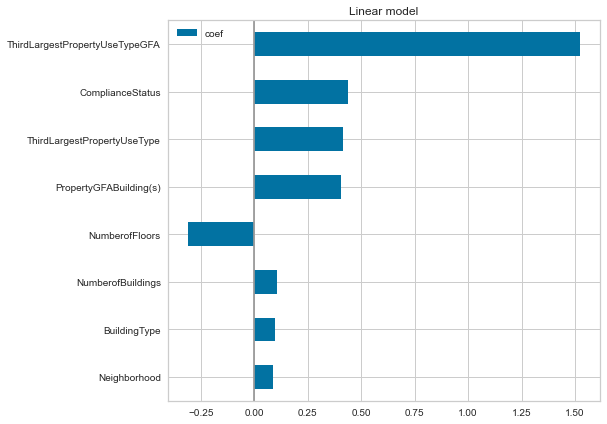

In [389]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [390]:
get_all_performances(value_train=(y_train, grid_search.best_estimator_.predict(X_train)),
                     values_test=(y_test, grid_search.best_estimator_.predict(X_test)),
                     metrics=METRICS
                    )

metric         train          test
0                        r2_score  8.119290e-01  5.527849e-01
1              mean_squared_error  7.238003e-01  1.729030e+00
2  mean_absolute_percentage_error  2.138492e+13  3.178419e+14
3                       max_error  4.334426e+00  1.552985e+01

In [240]:
from joblib import dump
dump(grid_search.best_estimator_, ' RegressionLineaire')

[' RegressionLineaire']

In [244]:
import pickle
model_path =Path(DATA_DIR, "LinearModel.pkl")
with open(model_path, "wb") as pickle_out:
    pickle.dump(grid_search.best_estimator_, pickle_out)

#### Avec EnergyStarScore

In [392]:
param_grid = {
    "regressor__fit_intercept": [True, False],
}
reg_pipe_OptVar_cv_est = modele_list_est[3]
grid_search_est = GridSearchCV(reg_pipe_OptVar_cv_est, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search_est

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_col...
                                                                                                        strategy='constant')),
                                                                                         ('target',
                                                                                          TargetEncoder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000218D6126040>)])),
                                       ('feature_selection',
                                        RFECV(cv=5,
                                              estimator=LinearRegression())),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [393]:
grid_search_est.fit(X_est_train[list_var_est[3]], y_est_train)

best_params_est = grid_search_est.best_params_
print(f"Best params: {best_params_est}")

Best params: {'regressor__fit_intercept': True}


In [394]:
print(f"Internal CV score: {grid_search_est.best_score_: .3f}")

Internal CV score:  0.588


In [395]:
grid_cv_results_est = grid_search_est.cv_results_

In [396]:
pd.DataFrame(grid_cv_results_est)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.237589      0.080978         0.030107        0.006167   
1       0.206330      0.019318         0.029903        0.004554   

  param_regressor__fit_intercept                               params  \
0                           True   {'regressor__fit_intercept': True}   
1                          False  {'regressor__fit_intercept': False}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.628231           0.646029           0.736654           0.524948   
1        -157.713850        -167.928408         -91.948067        -163.905435   

   ...  split2_train_score  split3_train_score  split4_train_score  \
0  ...            0.543849            0.570550            0.572448   
1  ...         -118.209166         -111.647568         -112.410439   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.556268            0.553259            0.645283   
1         -112.588603         -116.360314         -131.195574   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.568611            0.559452          0.569448         0.026558  
1         -113.499230         -116.319213       -115.587172         5.648386  

[2 rows x 31 columns]

In [234]:
np.exp(grid_search_est.predict(X_est_test[list_var_est[3]]))

array([3.31265550e+06, 4.98102416e+07, 3.13949864e+06, 6.43899655e+06,
       1.07513069e+06, 7.07937139e+05, 2.76404029e+06, 7.48478256e+06,
       2.42656148e+06, 1.04788781e+06, 3.83114417e+06, 2.06158127e+06,
       1.50884449e+06, 2.93976303e+06, 6.91600016e+06, 2.44901099e+07,
       4.42667532e+06, 1.31053673e+06, 1.28549484e+06, 1.21718646e+06,
       8.97091752e+06, 2.16778223e+07, 1.89493912e+07, 2.21900735e+06,
       2.07172100e+07, 1.17243574e+06, 4.27838228e+06, 2.61595698e+06,
       1.67242150e+06, 1.05515090e+07, 3.36293073e+06, 1.10287482e+06,
       2.49328188e+06, 4.24749711e+06, 3.51921261e+06, 2.82759148e+06,
       2.06172570e+06, 1.00857861e+06, 5.18449074e+06, 6.99516365e+05,
       3.26508289e+06, 3.20479120e+06, 1.35258456e+06, 8.77861975e+05,
       2.22935446e+06, 2.86220575e+06, 1.01612744e+06, 1.74477671e+06,
       1.82036088e+07, 5.52425590e+06, 2.72850934e+06, 2.24366440e+06,
       3.55067032e+06, 1.15050116e+06, 1.15494840e+06, 1.31056712e+06,
      

In [397]:
df_feature_importance_est = pd.DataFrame(reg_pipe_OptVar_cv_est[-1].coef_, columns=["coef"], index=grid_search_est.feature_names_in_)
print(f"Shape: {df_feature_importance_est.shape}")
df_feature_importance_est.head(4)

Shape: (4, 1)


coef
ThirdLargestPropertyUseType  0.544107
ComplianceStatus             0.441452
NumberofFloors              -0.361425
LargestPropertyUseTypeGFA    0.436240

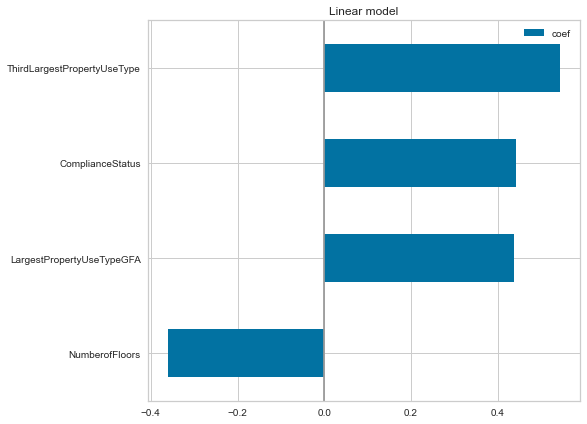

In [398]:
# top30 most important features
(df_feature_importance_est
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

In [399]:
get_all_performances(value_train=(y_train, grid_search_est.best_estimator_.predict(X_train)),
                     values_test=(y_test, grid_search_est.best_estimator_.predict(X_test)),
                     metrics=METRICS
                    )

metric         train          test
0                        r2_score  2.372483e-01  2.242031e-01
1              mean_squared_error  2.935487e+00  2.999398e+00
2  mean_absolute_percentage_error  6.504041e+14  6.589032e+14
3                       max_error  1.574609e+01  1.751676e+01

##### Enregistrer le modèle

In [241]:
from joblib import dump
dump(grid_search_est.best_estimator_, ' RegressionLineaire_est')

[' RegressionLineaire_est']

In [245]:
import pickle
model_path =Path(DATA_DIR, "LinearModel_est.pkl")
with open(model_path, "wb") as pickle_out:
    pickle.dump(grid_search_est.best_estimator_, pickle_out)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">3.2.2. Regression lasso</h4>
</div>

### Pipeline du modèle lasso

In [247]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
reg_pipe = define_pipeline(linear_model.Lasso(fit_intercept=True, alpha=1.,))
# Avec
reg_pipe_est = define_pipeline(linear_model.Lasso(fit_intercept=True, alpha=1.,), energyscore = True)
reg_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000218CEAAFFD0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('target',
                                                                   TargetEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000218D6126040>)])),
                ('regressor', Lasso())])

### Entrainement du modèle sans énergie score

In [248]:
# Train linear model sans energyscore
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

In [249]:
# get performances in train & test (Sans EnergyStarScore)
get_all_performances(value_train=(y_train, lr_pipe.predict(X_train)),
                     values_test=(y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS
                    )

metric         train          test
0                        r2_score  2.981994e-01  1.703123e-01
1              mean_squared_error  2.700914e+00  3.207751e+00
2  mean_absolute_percentage_error  4.407510e+14  5.275288e+14
3                       max_error  1.017810e+01  1.447293e+01

### Entrainement du modèle avec énergie score

In [250]:
# Train linear model avec energyscore
lr_results_est = train_model(model=reg_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

In [251]:
# get performances in train & test (Avec EnergyStarScore)
get_all_performances(value_train=(y_est_train, lr_pipe_est.predict(X_est_train)),
                     values_test=(y_est_test, lr_pipe_est.predict(X_est_test)),
                     metrics=METRICS
                    )

metric         train      test
0                        r2_score  2.691277e-02  0.028016
1              mean_squared_error  1.869432e+00  1.583220
2  mean_absolute_percentage_error  8.189526e+13  0.066006
3                       max_error  1.491121e+01  4.493742

### Sélection des variables

#### Sans EnergyStarScore

In [271]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

modele_reg = Pipeline([
    ("preprocess", full_pipeline),
    ('feature_selection', SelectFromModel(linear_model.Lasso(alpha=0.1))),
    ("regressor", linear_model.Lasso()),
    
])

sfm_results = train_model(model=modele_reg, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
sfm_pipe = sfm_results["estimator"]

selected_features = X_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()]
print(selected_features)
print(len(selected_features))

Index(['BuildingType', 'ThirdLargestPropertyUseType', 'ComplianceStatus',
       'NumberofFloors', 'PropertyGFABuilding(s)',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
6


In [298]:
## Meilleure combinaisons des paramètres
nombre = []
nbr_var = []
error_test = []
error_train = []
selected_features = []
rfe_pipe_list = []
for a in [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.01, 0.011, 0.012, 0.013,0.14, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03]:
    modele_reg = Pipeline([
        ("preprocess", full_pipeline),
        ('feature_selection', SelectFromModel(linear_model.Lasso(alpha=a))),
        ("regressor", linear_model.Lasso(alpha=a)),

    ])
    sfm_results = train_model(model=modele_reg, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
    sfm_pipe = sfm_results["estimator"]
    
    nombre.append(a)
    error_train.append(sfm_results["error_train"])
    error_test.append(sfm_results["error_test"])
    selected_features.append(X_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()])
    nbr_var.append(len(X_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()]))
    rfe_pipe_list.append(sfm_results["estimator"])
    
erreur_df = pd.DataFrame({
    'alpha': nombre,
    'error_train': error_train,
    'error_test' : error_test,
    'nbr_var' : nbr_var
})

print(erreur_df)

      alpha  error_train  error_test  nbr_var
0   0.00001     0.576686    1.639173       14
1   0.00010     0.576687    1.639060       14
2   0.00100     0.576716    1.638372       14
3   0.00200     0.576774    1.637675       13
4   0.00300     0.576870    1.637018       13
5   0.01000     0.578609    1.633502       13
6   0.01100     0.579010    1.633152       13
7   0.01200     0.579449    1.632844       13
8   0.01300     0.579927    1.632574       13
9   0.14000     0.703837    1.716383        5
10  0.01500     0.580870    1.632163       11
11  0.01600     0.581379    1.631990       11
12  0.01700     0.581921    1.631851       11
13  0.01800     0.582438    1.631814       10
14  0.01900     0.582813    1.631999       10
15  0.02000     0.583209    1.632202       10
16  0.02500     0.585489    1.633493       10
17  0.03000     0.588278    1.635241       10


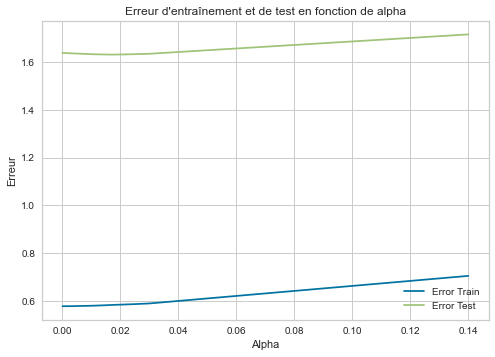

In [296]:
## Représentation graphique

# Triez le DataFrame par 'nbr_caract' pour une représentation correcte
erreur_df = erreur_df.sort_values(by='alpha')

# Créez un graphique avec 'nbr_caract' sur l'axe des abscisses
plt.plot(erreur_df['alpha'], erreur_df['error_train'], label='Error Train')
plt.plot(erreur_df['alpha'], erreur_df['error_test'], label='Error Test')

# Ajoutez des étiquettes et une légende
plt.xlabel('Alpha')
plt.ylabel('Erreur')
plt.title('Erreur d\'entraînement et de test en fonction de alpha')
plt.legend()

# Affichez le graphique
plt.show()


<p style="font-size: 20px; font-family: 'Times New Roman', serif;">Le alpha optimal est environ 0.018.</p>


### Optimisation des hyperparamètres

In [367]:
# Définir une grille d'hyperparamètres
param_grid = {
    "regressor__alpha": [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.01, 0.011, 0.012, 0.013,0.14, 0.015, 0.016, 
                         0.017, 0.018, 0.019, 0.02, 0.025, 0.03,0.1,0.25,0.5,0.8,1.0],
    "regressor__fit_intercept" : [True, False]
}
# pipeline de la regression lasso
reg_lasso_pipe = define_pipeline(linear_model.Lasso(fit_intercept=True, alpha=1.,))
# recherche d'hyperparamètre
grid_search = GridSearchCV(reg_lasso_pipe, param_grid, cv=5, scoring="r2", return_train_score=True)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_colu...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000218D6126310>)])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [1e-05, 0.0001, 0.001, 0.002,
                                              0.003, 0.01, 0.011, 0.012, 0.013,
                                              0.14, 0.015, 0.016, 0.017, 0.018,
                                              0.019, 0.02, 0.025, 0.03, 0.1,
                                              0.25, 0.5, 0.8, 1.0],
                         'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [368]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'regressor__alpha': 0.003, 'regressor__fit_intercept': True}


In [375]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

Internal CV score:  0.787


In [370]:
grid_cv_results = grid_search.cv_results_

In [344]:
pd.DataFrame(grid_cv_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.342965      0.148450         0.043590        0.009390   
1        0.350139      0.083110         0.061044        0.021462   
2        0.454621      0.281875         0.074590        0.029934   
3        0.232312      0.068398         0.053015        0.020874   
4        0.205064      0.025490         0.046143        0.008992   
5        0.340825      0.090249         0.096503        0.041945   
6        0.249390      0.079363         0.051628        0.020313   
7        0.249949      0.020766         0.047466        0.011209   
8        0.398008      0.270871         0.038714        0.004305   
9        0.223500      0.050277         0.056398        0.010386   
10       0.202634      0.023010         0.038689        0.005697   
11       0.189712      0.024999         0.040599        0.007353   
12       0.222903      0.051591         0.047538        0.007375   
13       0.172014      0.018689         0.032900        0.005868   
14       0.211750      0.055719         0.051788        0.025589   
15       0.159640      0.012141         0.033288        0.004064   
16       0.186604      0.019697         0.039828        0.007460   
17       0.217373      0.030002         0.039296        0.004815   
18       0.475372      0.121326         0.101462        0.021423   
19       0.516451      0.107544         0.098394        0.023563   
20       0.528529      0.136143         0.102880        0.027656   
21       0.619634      0.126790         0.112471        0.021566   
22       0.401648      0.022070         0.094333        0.004922   
23       0.369755      0.031488         0.082653        0.012491   
24       0.569471      0.112488         0.114308        0.041005   
25       0.244710      0.032771         0.043419        0.010337   
26       0.190059      0.013195         0.050437        0.013016   
27       0.189871      0.012852         0.033435        0.002811   
28       0.244080      0.095970         0.048212        0.009588   
29       0.569536      0.191728         0.112664        0.041271   
30       0.542918      0.176864         0.093310        0.036624   
31       0.366258      0.093767         0.111700        0.098389   
32       0.299159      0.047126         0.062938        0.019019   
33       0.345571      0.125177         0.085568        0.039509   
34       0.367354      0.204792         0.093544        0.071491   
35       0.434802      0.185894         0.069820        0.015790   
36       0.260051      0.052651         0.049171        0.015013   
37       0.192347      0.024965         0.041010        0.008475   
38       0.177865      0.018097         0.033906        0.004230   
39       0.165432      0.013059         0.038718        0.007197   
40       0.183063      0.011020         0.041384        0.007442   
41       0.173695      0.022730         0.033297        0.005395   
42       0.185837      0.033124         0.042433        0.014297   
43       0.219390      0.031783         0.047198        0.007264   
44       0.307988      0.142866         0.068324        0.048440   
45       0.368858      0.175202         0.052272        0.015460   

   param_regressor__alpha param_regressor__fit_intercept  \
0                 0.00001                           True   
1                 0.00001                          False   
2                  0.0001                           True   
3                  0.0001                          False   
4                   0.001                           True   
5                   0.001                          False   
6                   0.002                           True   
7                   0.002                          False   
8                   0.003                           True   
9                   0.003                          False   
10                   0.01                           True   
11                   0.01                          False   
12                  0.011  

In [345]:
np.exp(grid_search.predict(X_test))

array([1.03041881e+06, 9.60113137e+05, 4.91282152e+06, 8.40258816e+05,
       1.02680124e+07, 3.58817425e+06, 2.65692993e+05, 1.54910334e+07,
       4.80398565e+06, 8.30995718e+06, 9.07198293e+07, 6.09951154e+06,
       6.98970422e+05, 5.34987740e+06, 1.26217103e+07, 7.88421359e+06,
       1.91584448e+07, 4.79613428e+06, 6.92780982e+06, 7.93333713e+05,
       5.47834465e+06, 1.69143327e+06, 3.19487210e+06, 1.40378924e+06,
       1.46230763e+08, 4.89060198e+06, 3.73134033e+06, 1.79255535e+07,
       4.05499273e+06, 1.32296567e+06, 1.10320489e+07, 2.41906693e+06,
       2.58341118e+06, 2.03208040e+06, 5.43053518e+06, 8.73920302e+05,
       7.45629281e+06, 1.54634649e+07, 8.34085808e+06, 3.14281198e+06,
       1.24263932e+07, 1.44708279e+06, 1.10640198e+06, 3.49025104e+06,
       2.17840171e+06, 2.30025283e+06, 1.19165801e+06, 1.94703126e+06,
       2.04150448e+06, 2.24740763e+06, 1.03825951e+06, 1.36352990e+06,
       1.39197581e+06, 5.52146802e+06, 5.48814224e+06, 1.62076727e+07,
      

In [371]:
## récupérer le meilleur modèle
best_lasso_model = grid_search.best_estimator_

In [372]:
# Obtenez les caractéristiques sélectionnées et leurs coefficients
lasso_coefs = best_lasso_model.named_steps['regressor'].coef_
selected_features_lasso = X_train.columns[lasso_coefs != 0]

# Créez un DataFrame pour afficher les résultats
lasso_coefficients_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Coefficient': lasso_coefs[lasso_coefs != 0]
})

# Affichez les caractéristiques sélectionnées et leurs coefficients
print(lasso_coefficients_df)

                           Feature  Coefficient
0                     BuildingType     0.088310
1                     Neighborhood     0.076489
2           LargestPropertyUseType    -0.060882
3     SecondLargestPropertyUseType     0.005363
4      ThirdLargestPropertyUseType     0.394370
5                 ComplianceStatus     0.481928
6                        YearBuilt     0.043425
7                NumberofBuildings     0.087483
8                   NumberofFloors    -0.308650
9               PropertyGFAParking     0.019641
10          PropertyGFABuilding(s)     0.401570
11       LargestPropertyUseTypeGFA     0.006600
12  ThirdLargestPropertyUseTypeGFA     1.518379


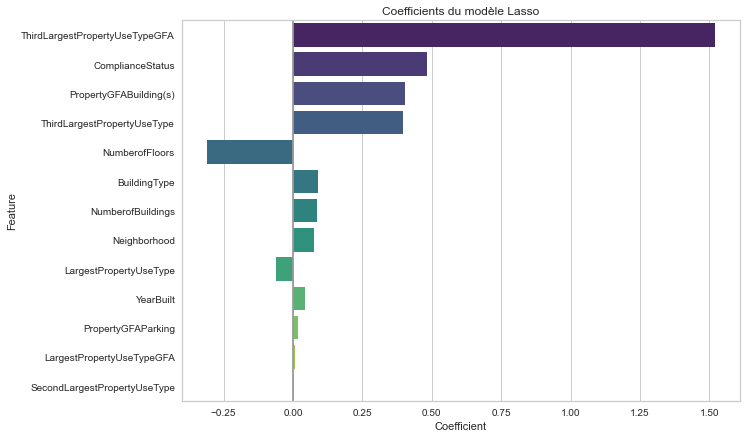

In [373]:
# Trier les coefficients par valeur absolue pour un affichage plus clair
lasso_coefficients_df_sorted = lasso_coefficients_df.sort_values("Coefficient", key=lambda v: abs(v), ascending=False)

# Tracer le graphique
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients_df_sorted, palette='viridis')
plt.title("Coefficients du modèle Lasso")
plt.axvline(x=0, color='.6')
plt.show()

In [376]:
get_all_performances(value_train=(y_train, best_lasso_model.predict(X_train)),
                     values_test=(y_test, best_lasso_model.predict(X_test)),
                     metrics=METRICS
                    )

metric         train          test
0                        r2_score  8.501072e-01  5.765837e-01
1              mean_squared_error  5.768697e-01  1.637018e+00
2  mean_absolute_percentage_error  2.217827e+13  3.165582e+14
3                       max_error  3.887608e+00  1.525812e+01

In [350]:
from joblib import dump
dump(best_lasso_model, ' RegressionLasso')

[' RegressionLasso']

In [351]:
import pickle
model_path =Path(DATA_DIR, "LassoModel.pkl")
with open(model_path, "wb") as pickle_out:
    pickle.dump(best_lasso_model, pickle_out)

#### Avec EnergyStarScore

In [336]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

modele_reg = Pipeline([
    ("preprocess", full_pipeline_est),
    ('feature_selection', SelectFromModel(linear_model.Lasso(alpha=0.1))),
    ("regressor", linear_model.Lasso(alpha=0.1)),
    
])

sfm_results = train_model(model=modele_reg, x_train=X_est_train, y_train=y_est_train, x_test=X_est_test, y_test=y_est_test)
sfm_pipe = sfm_results["estimator"]

selected_features = X_est_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()]
print(selected_features)
print(len(selected_features))

Index(['ThirdLargestPropertyUseType', 'ComplianceStatus', 'NumberofFloors',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA'],
      dtype='object')
5


In [337]:
## Meilleure combinaisons des paramètres
nombre = []
nbr_var = []
error_test = []
error_train = []
selected_features = []
rfe_pipe_list = []
for a in [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.01, 0.011, 0.012, 0.013,0.14, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.025, 0.03]:
    modele_reg = Pipeline([
        ("preprocess", full_pipeline_est),
        ('feature_selection', SelectFromModel(linear_model.Lasso(alpha=a))),
        ("regressor", linear_model.Lasso(alpha=a)),

    ])
    sfm_results = train_model(model=modele_reg, x_train=X_est_train, y_train=y_est_train, x_test=X_est_test, y_test=y_est_test)
    sfm_pipe = sfm_results["estimator"]
    
    nombre.append(a)
    error_train.append(sfm_results["error_train"])
    error_test.append(sfm_results["error_test"])
    selected_features.append(X_est_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()])
    nbr_var.append(len(X_est_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()]))
    rfe_pipe_list.append(sfm_results["estimator"])
    
erreur_df = pd.DataFrame({
    'alpha': nombre,
    'error_train': error_train,
    'error_test' : error_test,
    'nbr_var' : nbr_var
})

print(erreur_df)

      alpha  error_train  error_test  nbr_var
0   0.00001     0.535400    0.319515       15
1   0.00010     0.535400    0.319465       15
2   0.00100     0.535451    0.319048       15
3   0.00200     0.535605    0.318688       15
4   0.00300     0.535860    0.318435       15
5   0.01000     0.539723    0.318936       14
6   0.01100     0.540406    0.319145       14
7   0.01200     0.541089    0.319304       13
8   0.01300     0.541642    0.319226       13
9   0.14000     0.615271    0.365376        4
10  0.01500     0.542667    0.318953       12
11  0.01600     0.543097    0.318721       12
12  0.01700     0.543555    0.318517       12
13  0.01800     0.544041    0.318342       12
14  0.01900     0.544441    0.318157       11
15  0.02000     0.544663    0.317924       11
16  0.02500     0.545942    0.316945       11
17  0.03000     0.547504    0.316282       11


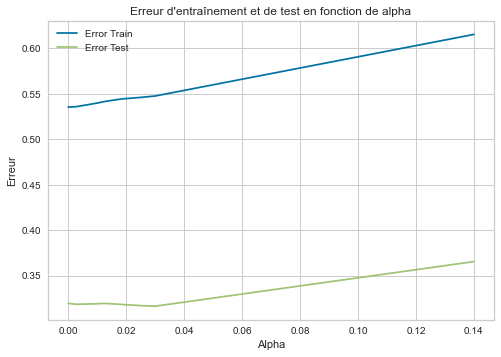

In [338]:
## Représentation graphique

# Triez le DataFrame par 'nbr_caract' pour une représentation correcte
erreur_df = erreur_df.sort_values(by='alpha')

# Créez un graphique avec 'nbr_caract' sur l'axe des abscisses
plt.plot(erreur_df['alpha'], erreur_df['error_train'], label='Error Train')
plt.plot(erreur_df['alpha'], erreur_df['error_test'], label='Error Test')

# Ajoutez des étiquettes et une légende
plt.xlabel('Alpha')
plt.ylabel('Erreur')
plt.title('Erreur d\'entraînement et de test en fonction de alpha')
plt.legend()

# Affichez le graphique
plt.show()


### Optimisation des hyperparamètres

In [352]:
# Définir une grille d'hyperparamètres
param_grid = {
    "regressor__alpha": [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.01, 0.011, 0.012, 0.013,0.14, 0.015, 0.016, 
                         0.017, 0.018, 0.019, 0.02, 0.025, 0.03,0.1,0.25,0.5,0.8,1.0],
    "regressor__fit_intercept" : [True, False]
}
# pipeline de la regression lasso
reg_lasso_pipe = define_pipeline(linear_model.Lasso(fit_intercept=True, alpha=1.,), energyscore = True)
# recherche d'hyperparamètre
grid_search = GridSearchCV(reg_lasso_pipe, param_grid, cv=5, scoring="r2", return_train_score=True)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<function optional_log_transform at 0x00000218B6B00430>)),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_colu...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000218D6126040>)])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [1e-05, 0.0001, 0.001, 0.002,
                                              0.003, 0.01, 0.011, 0.012, 0.013,
                                              0.14, 0.015, 0.016, 0.017, 0.018,
                                              0.019, 0.02, 0.025, 0.03, 0.1,
                                              0.25, 0.5, 0.8, 1.0],
                         'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [353]:
grid_search.fit(X_est_train, y_est_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'regressor__alpha': 0.02, 'regressor__fit_intercept': True}


In [354]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

Internal CV score:  0.729


In [355]:
grid_cv_results = grid_search.cv_results_

In [356]:
pd.DataFrame(grid_cv_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.297381      0.127800         0.053642        0.024881   
1        0.223355      0.071455         0.042284        0.007258   
2        0.258865      0.078040         0.049137        0.011953   
3        0.262746      0.045296         0.064077        0.018320   
4        0.235945      0.040553         0.042701        0.004073   
5        0.198692      0.027971         0.036497        0.007835   
6        0.176250      0.025591         0.031864        0.002571   
7        0.146820      0.014262         0.031160        0.003402   
8        0.167391      0.016316         0.039456        0.006632   
9        0.159843      0.006369         0.033415        0.003679   
10       0.154609      0.010158         0.034974        0.008620   
11       0.158758      0.019643         0.034214        0.004225   
12       0.164603      0.019690         0.033162        0.002643   
13       0.236156      0.172537         0.044226        0.018454   
14       0.183714      0.022737         0.037496        0.007023   
15       0.208021      0.014840         0.044828        0.005090   
16       0.194610      0.031034         0.036833        0.005059   
17       0.169291      0.024890         0.034752        0.004437   
18       0.194882      0.069726         0.035091        0.003976   
19       0.152107      0.018742         0.028858        0.000452   
20       0.172591      0.022193         0.033471        0.004469   
21       0.167631      0.013744         0.038285        0.005465   
22       0.211884      0.060230         0.056445        0.029219   
23       0.460114      0.241567         0.081162        0.029939   
24       0.242322      0.027391         0.053596        0.009123   
25       0.405619      0.016558         0.085515        0.006475   
26       0.492154      0.159721         0.087640        0.029270   
27       0.794905      0.203140         0.169161        0.062817   
28       0.686372      0.163466         0.143147        0.045344   
29       0.675123      0.159205         0.140696        0.049066   
30       0.683561      0.073252         0.157414        0.028842   
31       0.340233      0.102925         0.054521        0.010481   
32       0.268392      0.121443         0.066431        0.023039   
33       0.195426      0.040081         0.040262        0.009653   
34       0.303111      0.066987         0.057301        0.027490   
35       0.216168      0.023475         0.042674        0.008607   
36       0.195315      0.033212         0.039427        0.007820   
37       0.209520      0.040468         0.045412        0.009860   
38       0.204200      0.016157         0.046773        0.006494   
39       0.192012      0.046381         0.038691        0.005443   
40       0.146101      0.004103         0.032245        0.003532   
41       0.149943      0.011343         0.032636        0.004453   
42       0.163323      0.031137         0.031274        0.001861   
43       0.144381      0.005015         0.030378        0.002042   
44       0.142801      0.010763         0.030419        0.001861   
45       0.153249      0.009246         0.030282        0.001413   

   param_regressor__alpha param_regressor__fit_intercept  \
0                 0.00001                           True   
1                 0.00001                          False   
2                  0.0001                           True   
3                  0.0001                          False   
4                   0.001                           True   
5                   0.001                          False   
6                   0.002                           True   
7                   0.002                          False   
8                   0.003                           True   
9                   0.003                          False   
10                   0.01                           True   
11                   0.01                          False   
12                  0.011  

In [357]:
np.exp(grid_search.predict(X_est_test))

array([3.24367124e+06, 3.99311707e+07, 3.25741539e+06, 7.50186270e+06,
       1.32663305e+06, 1.04357590e+06, 1.68623897e+06, 3.65641548e+06,
       1.49125067e+06, 1.09540335e+06, 1.74699228e+07, 3.47923436e+06,
       2.35869758e+06, 1.16322161e+06, 5.84976944e+06, 3.74547915e+07,
       1.03416510e+07, 1.19191027e+06, 1.40326283e+06, 5.60699270e+05,
       1.00865510e+07, 2.19253355e+07, 1.79424034e+07, 2.09582914e+06,
       4.37612832e+07, 1.24539303e+06, 2.31217029e+06, 2.51835638e+06,
       1.52285379e+06, 4.94616418e+06, 3.30902979e+06, 1.01082522e+06,
       2.53620659e+06, 3.40998271e+06, 3.91257675e+06, 2.16279206e+06,
       2.71654432e+06, 1.93019456e+06, 4.73144872e+06, 1.06526309e+06,
       4.18675277e+06, 3.45895812e+06, 1.47387118e+06, 6.53712582e+05,
       1.97754522e+06, 5.11528301e+06, 5.52216675e+05, 9.83517345e+05,
       1.65544406e+07, 5.86041964e+06, 1.06564740e+06, 5.97302460e+06,
       3.60628413e+06, 1.23551391e+06, 4.67643127e+06, 1.30979806e+06,
      

In [358]:
## récupérer le meilleur modèle
best_lasso_model = grid_search.best_estimator_

In [360]:
# Obtenez les caractéristiques sélectionnées et leurs coefficients
lasso_coefs = best_lasso_model.named_steps['regressor'].coef_
selected_features_lasso = X_est_train.columns[lasso_coefs != 0]

# Créez un DataFrame pour afficher les résultats
lasso_coefficients_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Coefficient': lasso_coefs[lasso_coefs != 0]
})

# Affichez les caractéristiques sélectionnées et leurs coefficients
print(lasso_coefficients_df)

                            Feature  Coefficient
0                      BuildingType     0.011674
1                      Neighborhood     0.043907
2       ThirdLargestPropertyUseType     0.464441
3                  ComplianceStatus     0.463947
4                         YearBuilt     0.024128
5                 NumberofBuildings     0.035661
6                    NumberofFloors    -0.327286
7            PropertyGFABuilding(s)     0.009957
8         LargestPropertyUseTypeGFA     0.396738
9   SecondLargestPropertyUseTypeGFA     0.020992
10                  ENERGYSTARScore     0.043635


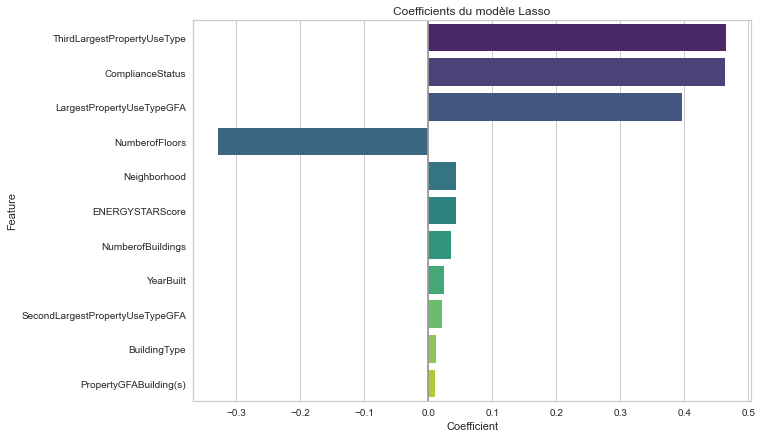

In [361]:
# Trier les coefficients par valeur absolue pour un affichage plus clair
lasso_coefficients_df_sorted = lasso_coefficients_df.sort_values("Coefficient", key=lambda v: abs(v), ascending=False)

# Tracer le graphique
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients_df_sorted, palette='viridis')
plt.title("Coefficients du modèle Lasso")
plt.axvline(x=0, color='.6')
plt.show()

In [362]:
get_all_performances(value_train=(y_est_train, best_lasso_model.predict(X_est_train)),
                     values_test=(y_est_test, best_lasso_model.predict(X_est_test)),
                     metrics=METRICS
                    )

metric         train      test
0                        r2_score  7.164890e-01  0.804818
1              mean_squared_error  5.446629e-01  0.317924
2  mean_absolute_percentage_error  7.627750e+13  0.028675
3                       max_error  1.388835e+01  2.563725

In [365]:
from joblib import dump
dump(best_lasso_model, ' RegressionLasso_est')

[' RegressionLasso_est']

In [366]:
import pickle
model_path =Path(DATA_DIR, "LassoModel_est.pkl")
with open(model_path, "wb") as pickle_out:
    pickle.dump(best_lasso_model, pickle_out)

<div style="border: 1px solid RGB(51,165,182);">
<h4 style="margin: auto; padding: 17px; color: RGB(51,165,182); "> 3.2.3. Random Forest</h4>
</div>

### Pipeline du modèle Random Forest

In [442]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
rmf_pipe = define_pipeline(RandomForestRegressor(n_estimators=100, random_state=416))
# Avec
rmf_pipe_est = define_pipeline(RandomForestRegressor(n_estimators=100, random_state=416), energyscore = True)
rmf_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function optional_log_transform at 0x000001777A07B380>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017779C82FD0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('target',
                                                                   TargetEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017779C82890>)])),
                ('regressor', RandomForestRegressor(random_state=416))])

### Entrainement du modèle sans énergie score

In [443]:
# Train linear model sans energyscore
rmf_results = train_model(model=rmf_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

rmf_pipe = rmf_results["estimator"]

In [444]:
# get performances in train & test (Sans EnergyStarScore)
get_all_performances(value_train=(y_train, rmf_pipe.predict(X_train)),
                     values_test=(y_test, rmf_pipe.predict(X_test)),
                     metrics=METRICS
                    )

metric     train          test
0                        r2_score  0.982102  5.383469e-01
1              mean_squared_error  0.068882  1.784850e+00
2  mean_absolute_percentage_error  0.013148  3.524302e+14
3                       max_error  1.150147  1.827548e+01

### Entrainement du modèle avec énergie score

In [445]:
# Train linear model avec energyscore
rmf_results_est = train_model(model=rmf_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

rmf_pipe_est = rmf_results_est["estimator"]

In [446]:
# get performances in train & test (Avec EnergyStarScore)
get_all_performances(value_train=(y_est_train, rmf_pipe_est.predict(X_est_train)),
                     values_test=(y_est_test, rmf_pipe_est.predict(X_est_test)),
                     metrics=METRICS
                    )

metric         train      test
0                        r2_score  9.634804e-01  0.884033
1              mean_squared_error  7.015904e-02  0.188893
2  mean_absolute_percentage_error  2.534990e+13  0.021539
3                       max_error  4.615623e+00  1.827625

### Sélection des variables

#### Sans EnergyStarScore

In [447]:

modele_rmf = Pipeline([
    ("preprocess", full_pipeline),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=416))),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=416)),
    
])

sfm_results = train_model(model=modele_rmf, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
sfm_pipe = sfm_results["estimator"]

selected_features = X_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()]
print(selected_features)
print(len(selected_features))

Index(['ThirdLargestPropertyUseType', 'ComplianceStatus',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
3


In [449]:
## Meilleure combinaisons des paramètres
nombre = []
nbr_var = []
error_test = []
error_train = []
selected_features = []
rfe_pipe_list = []
for n in np.arange(100,700,50):
    modele_rfm = Pipeline([
        ("preprocess", full_pipeline),
        ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=n, random_state=416))),
        ("regressor", RandomForestRegressor(n_estimators=n, random_state=416)),

    ])
    sfm_results = train_model(model=modele_rfm, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
    sfm_pipe = sfm_results["estimator"]
    
    nombre.append(n)
    error_train.append(sfm_results["error_train"])
    error_test.append(sfm_results["error_test"])
    selected_features.append(X_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()])
    nbr_var.append(len(X_train.columns[sfm_pipe.named_steps['feature_selection'].get_support()]))
    rfe_pipe_list.append(sfm_results["estimator"])
    
erreur_df = pd.DataFrame({
    'n_estimator': nombre,
    'error_train': error_train,
    'error_test' : error_test,
    'nbr_var' : nbr_var
})

print(erreur_df)

    n_estimator  error_train  error_test  nbr_var
0           100     0.128356    2.000915        3
1           150     0.127845    1.995520        3
2           200     0.127057    1.992837        3
3           250     0.126593    1.996495        3
4           300     0.125597    1.995727        3
5           350     0.125281    1.996973        3
6           400     0.125252    1.997765        3
7           450     0.124649    1.996269        3
8           500     0.124760    1.997384        3
9           550     0.124648    1.996062        3
10          600     0.124382    1.995806        3
11          650     0.124047    1.996547        3


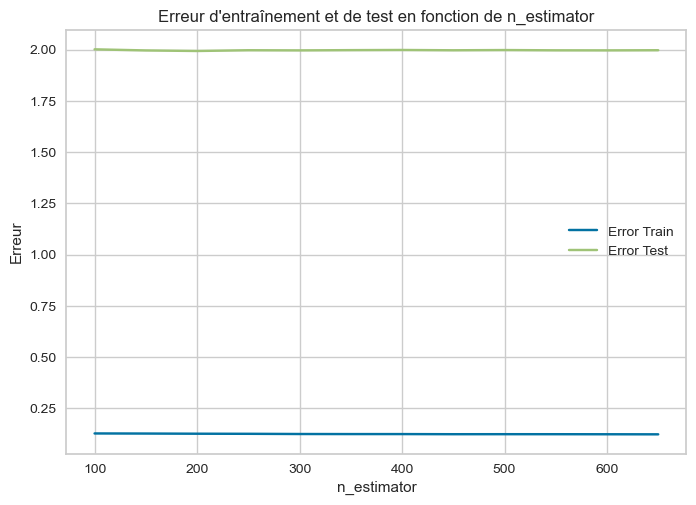

In [450]:
## Représentation graphique

# Triez le DataFrame par 'nbr_caract' pour une représentation correcte
erreur_df = erreur_df.sort_values(by='n_estimator')

# Créez un graphique avec 'nbr_caract' sur l'axe des abscisses
plt.plot(erreur_df['n_estimator'], erreur_df['error_train'], label='Error Train')
plt.plot(erreur_df['n_estimator'], erreur_df['error_test'], label='Error Test')

# Ajoutez des étiquettes et une légende
plt.xlabel('n_estimator')
plt.ylabel('Erreur')
plt.title('Erreur d\'entraînement et de test en fonction de n_estimator')
plt.legend()

# Affichez le graphique
plt.show()


#### Sans EnergyStarScore

### Optimisation des hyperparamètres

In [456]:
# Définir une grille d'hyperparamètres
random_grid = {'n_estimators': np.arange(100,500,50),
               'max_features': ['auto', 'sqrt'],
              # 'max_depth': np.arange(10,120,10),
               'min_samples_split': np.arange(2,13,2),
               'min_samples_leaf': np.arange(1,5)}

# pipeline de la regression lasso
rfm_pipe = define_pipeline(RandomForestRegressor(random_state=416))
# recherche d'hyperparamètre
grid_search = GridSearchCV(rfm_pipe, random_grid, cv=5, scoring="r2", return_train_score=True)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<function optional_log_transform at 0x000001777A07B380>)),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_colu...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000017779C81150>)])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=416))]),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             return_train_score=True, scoring='r2')

In [457]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

ValueError: Invalid parameter 'max_features' for estimator Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function optional_log_transform at 0x000001777A07B380>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000177F730E410>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('target',
                                                                   TargetEncoder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000177F72FD750>)])),
                ('regressor', RandomForestRegressor(random_state=416))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [375]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

Internal CV score:  0.787


In [370]:
grid_cv_results = grid_search.cv_results_

In [344]:
pd.DataFrame(grid_cv_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.342965      0.148450         0.043590        0.009390   
1        0.350139      0.083110         0.061044        0.021462   
2        0.454621      0.281875         0.074590        0.029934   
3        0.232312      0.068398         0.053015        0.020874   
4        0.205064      0.025490         0.046143        0.008992   
5        0.340825      0.090249         0.096503        0.041945   
6        0.249390      0.079363         0.051628        0.020313   
7        0.249949      0.020766         0.047466        0.011209   
8        0.398008      0.270871         0.038714        0.004305   
9        0.223500      0.050277         0.056398        0.010386   
10       0.202634      0.023010         0.038689        0.005697   
11       0.189712      0.024999         0.040599        0.007353   
12       0.222903      0.051591         0.047538        0.007375   
13       0.172014      0.018689         0.032900        0.005868   
14       0.211750      0.055719         0.051788        0.025589   
15       0.159640      0.012141         0.033288        0.004064   
16       0.186604      0.019697         0.039828        0.007460   
17       0.217373      0.030002         0.039296        0.004815   
18       0.475372      0.121326         0.101462        0.021423   
19       0.516451      0.107544         0.098394        0.023563   
20       0.528529      0.136143         0.102880        0.027656   
21       0.619634      0.126790         0.112471        0.021566   
22       0.401648      0.022070         0.094333        0.004922   
23       0.369755      0.031488         0.082653        0.012491   
24       0.569471      0.112488         0.114308        0.041005   
25       0.244710      0.032771         0.043419        0.010337   
26       0.190059      0.013195         0.050437        0.013016   
27       0.189871      0.012852         0.033435        0.002811   
28       0.244080      0.095970         0.048212        0.009588   
29       0.569536      0.191728         0.112664        0.041271   
30       0.542918      0.176864         0.093310        0.036624   
31       0.366258      0.093767         0.111700        0.098389   
32       0.299159      0.047126         0.062938        0.019019   
33       0.345571      0.125177         0.085568        0.039509   
34       0.367354      0.204792         0.093544        0.071491   
35       0.434802      0.185894         0.069820        0.015790   
36       0.260051      0.052651         0.049171        0.015013   
37       0.192347      0.024965         0.041010        0.008475   
38       0.177865      0.018097         0.033906        0.004230   
39       0.165432      0.013059         0.038718        0.007197   
40       0.183063      0.011020         0.041384        0.007442   
41       0.173695      0.022730         0.033297        0.005395   
42       0.185837      0.033124         0.042433        0.014297   
43       0.219390      0.031783         0.047198        0.007264   
44       0.307988      0.142866         0.068324        0.048440   
45       0.368858      0.175202         0.052272        0.015460   

   param_regressor__alpha param_regressor__fit_intercept  \
0                 0.00001                           True   
1                 0.00001                          False   
2                  0.0001                           True   
3                  0.0001                          False   
4                   0.001                           True   
5                   0.001                          False   
6                   0.002                           True   
7                   0.002                          False   
8                   0.003                           True   
9                   0.003                          False   
10                   0.01                           True   
11                   0.01                          False   
12                  0.011  

In [345]:
np.exp(grid_search.predict(X_test))

array([1.03041881e+06, 9.60113137e+05, 4.91282152e+06, 8.40258816e+05,
       1.02680124e+07, 3.58817425e+06, 2.65692993e+05, 1.54910334e+07,
       4.80398565e+06, 8.30995718e+06, 9.07198293e+07, 6.09951154e+06,
       6.98970422e+05, 5.34987740e+06, 1.26217103e+07, 7.88421359e+06,
       1.91584448e+07, 4.79613428e+06, 6.92780982e+06, 7.93333713e+05,
       5.47834465e+06, 1.69143327e+06, 3.19487210e+06, 1.40378924e+06,
       1.46230763e+08, 4.89060198e+06, 3.73134033e+06, 1.79255535e+07,
       4.05499273e+06, 1.32296567e+06, 1.10320489e+07, 2.41906693e+06,
       2.58341118e+06, 2.03208040e+06, 5.43053518e+06, 8.73920302e+05,
       7.45629281e+06, 1.54634649e+07, 8.34085808e+06, 3.14281198e+06,
       1.24263932e+07, 1.44708279e+06, 1.10640198e+06, 3.49025104e+06,
       2.17840171e+06, 2.30025283e+06, 1.19165801e+06, 1.94703126e+06,
       2.04150448e+06, 2.24740763e+06, 1.03825951e+06, 1.36352990e+06,
       1.39197581e+06, 5.52146802e+06, 5.48814224e+06, 1.62076727e+07,
      

In [371]:
## récupérer le meilleur modèle
best_rfm_model = grid_search.best_estimator_

In [372]:
# Obtenez les caractéristiques sélectionnées et leurs coefficients
lasso_coefs = best_lasso_model.named_steps['regressor'].coef_
selected_features_lasso = X_train.columns[lasso_coefs != 0]

# Créez un DataFrame pour afficher les résultats
lasso_coefficients_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Coefficient': lasso_coefs[lasso_coefs != 0]
})

# Affichez les caractéristiques sélectionnées et leurs coefficients
print(lasso_coefficients_df)

                           Feature  Coefficient
0                     BuildingType     0.088310
1                     Neighborhood     0.076489
2           LargestPropertyUseType    -0.060882
3     SecondLargestPropertyUseType     0.005363
4      ThirdLargestPropertyUseType     0.394370
5                 ComplianceStatus     0.481928
6                        YearBuilt     0.043425
7                NumberofBuildings     0.087483
8                   NumberofFloors    -0.308650
9               PropertyGFAParking     0.019641
10          PropertyGFABuilding(s)     0.401570
11       LargestPropertyUseTypeGFA     0.006600
12  ThirdLargestPropertyUseTypeGFA     1.518379


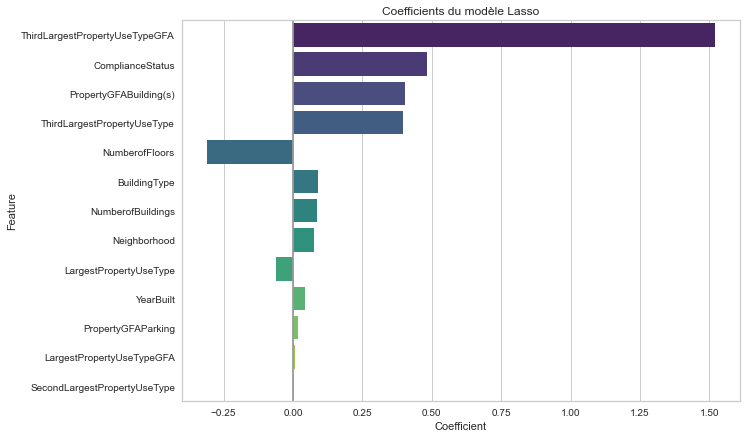

In [373]:
# Trier les coefficients par valeur absolue pour un affichage plus clair
rfm_coefficients_df_sorted = lasso_coefficients_df.sort_values("Coefficient", key=lambda v: abs(v), ascending=False)

# Tracer le graphique
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients_df_sorted, palette='viridis')
plt.title("Coefficients du modèle Lasso")
plt.axvline(x=0, color='.6')
plt.show()

In [376]:
get_all_performances(value_train=(y_train, best_rfm_model.predict(X_train)),
                     values_test=(y_test, best_rfm_model.predict(X_test)),
                     metrics=METRICS
                    )

metric         train          test
0                        r2_score  8.501072e-01  5.765837e-01
1              mean_squared_error  5.768697e-01  1.637018e+00
2  mean_absolute_percentage_error  2.217827e+13  3.165582e+14
3                       max_error  3.887608e+00  1.525812e+01

In [350]:
from joblib import dump
dump(best_rfm_model, ' RandomForest')

[' RegressionLasso']

In [351]:
import pickle
model_path =Path(DATA_DIR, "RandomForest.pkl")
with open(model_path, "wb") as pickle_out:
    pickle.dump(best_rfm_model, pickle_out)